# Effect of Gender and Relationship on People's Weekly Working Hours

Dansie Feng  
Harry Li  
Vicky Lin

![alt text for screen readers](https://blog.vantagecircle.com/content/images/2019/07/flexible-working-time.png "Text to show on mouseover")

*[1] Picture Originated from Vantage Circle*

## Introduction

According to Lucía Artazcoz, et al, long working hours will severely affect both of people’s physical and mental health with low work efficiency. Nowadays, the fact that this world is filled with countless working opportunities with various working standards has gained our attention towards the working hours that vary between different people due to different reasons. Therefore we decided to use the Adult dataset from the 1944 Census database by Barry Becker to examine how 2 factors: **sex and relationship that affect people's hours per week** out of 14 factors included in the dataset?   

We will use statistical inference techniques, hypothesis testing, bootstrapping methods with error analysis and confidence intervals to find mean and standard deviation. We will use the result to  evaluate and determine the significance of each factor that contributes to working hours, and help people determine the most suitable working hours for different types of people. 

## Method and Results

### Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(cowplot)
library(infer)
library(datateachr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



#### Load Data

We first load the dataset from website to R. We name the dataset `adult`.

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult <- read_csv(url, col_names = F)

head(adult)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X2, X4, X6, X7, X8, X9, X10, X14, X15
dbl (6): X1, X3, X5, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


*Table 1.1 The dataset without specific variables name*

#### Clean and Wrangle Data

We rename the variables and give each of them a meaningful name.

In [3]:
#Tidy the data
adult_tidy <- adult %>%
    rename(age = X1,
           workclass = X2,
           serial_num = X3,
           education = X4,
          education_num = X5,
          marital_status = X6,
          occupation =X7,
          relationship = X8,
          race =X9, 
          sex =X10,
          capital_gain =X11,
          capital_loss = X12,
          hours_per_week = X13,
          native_country = X14,
          income = X15)

head(adult_tidy)

age,workclass,serial_num,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


*Table 1.2 The dataset with specific variables name*

We want to study how owning children can influence weekly working hours, so we regroup the variable `relationship` into `With Child` and `Without Child` . Then we select the variables `sex`, `relationship` and `hours_per_week` that we are going to study in this project.

In [4]:
adult_data <- 
    adult_tidy %>%
    mutate(adult_tidy, 
           relationship = ifelse(relationship == "Own-child", "With Child" , "Without Child")) %>%
    select(sex, relationship, hours_per_week)

head(adult_data)

sex,relationship,hours_per_week
<chr>,<chr>,<dbl>
Male,Without Child,40
Male,Without Child,13
Male,Without Child,40
Male,Without Child,40
Female,Without Child,40
Female,Without Child,40


*Table 1.3 The dataset with columns we need in the question*

#### View Data Visually

We use a boxplot to demonstrate the relationship between `sex` and `hours_per_week`.

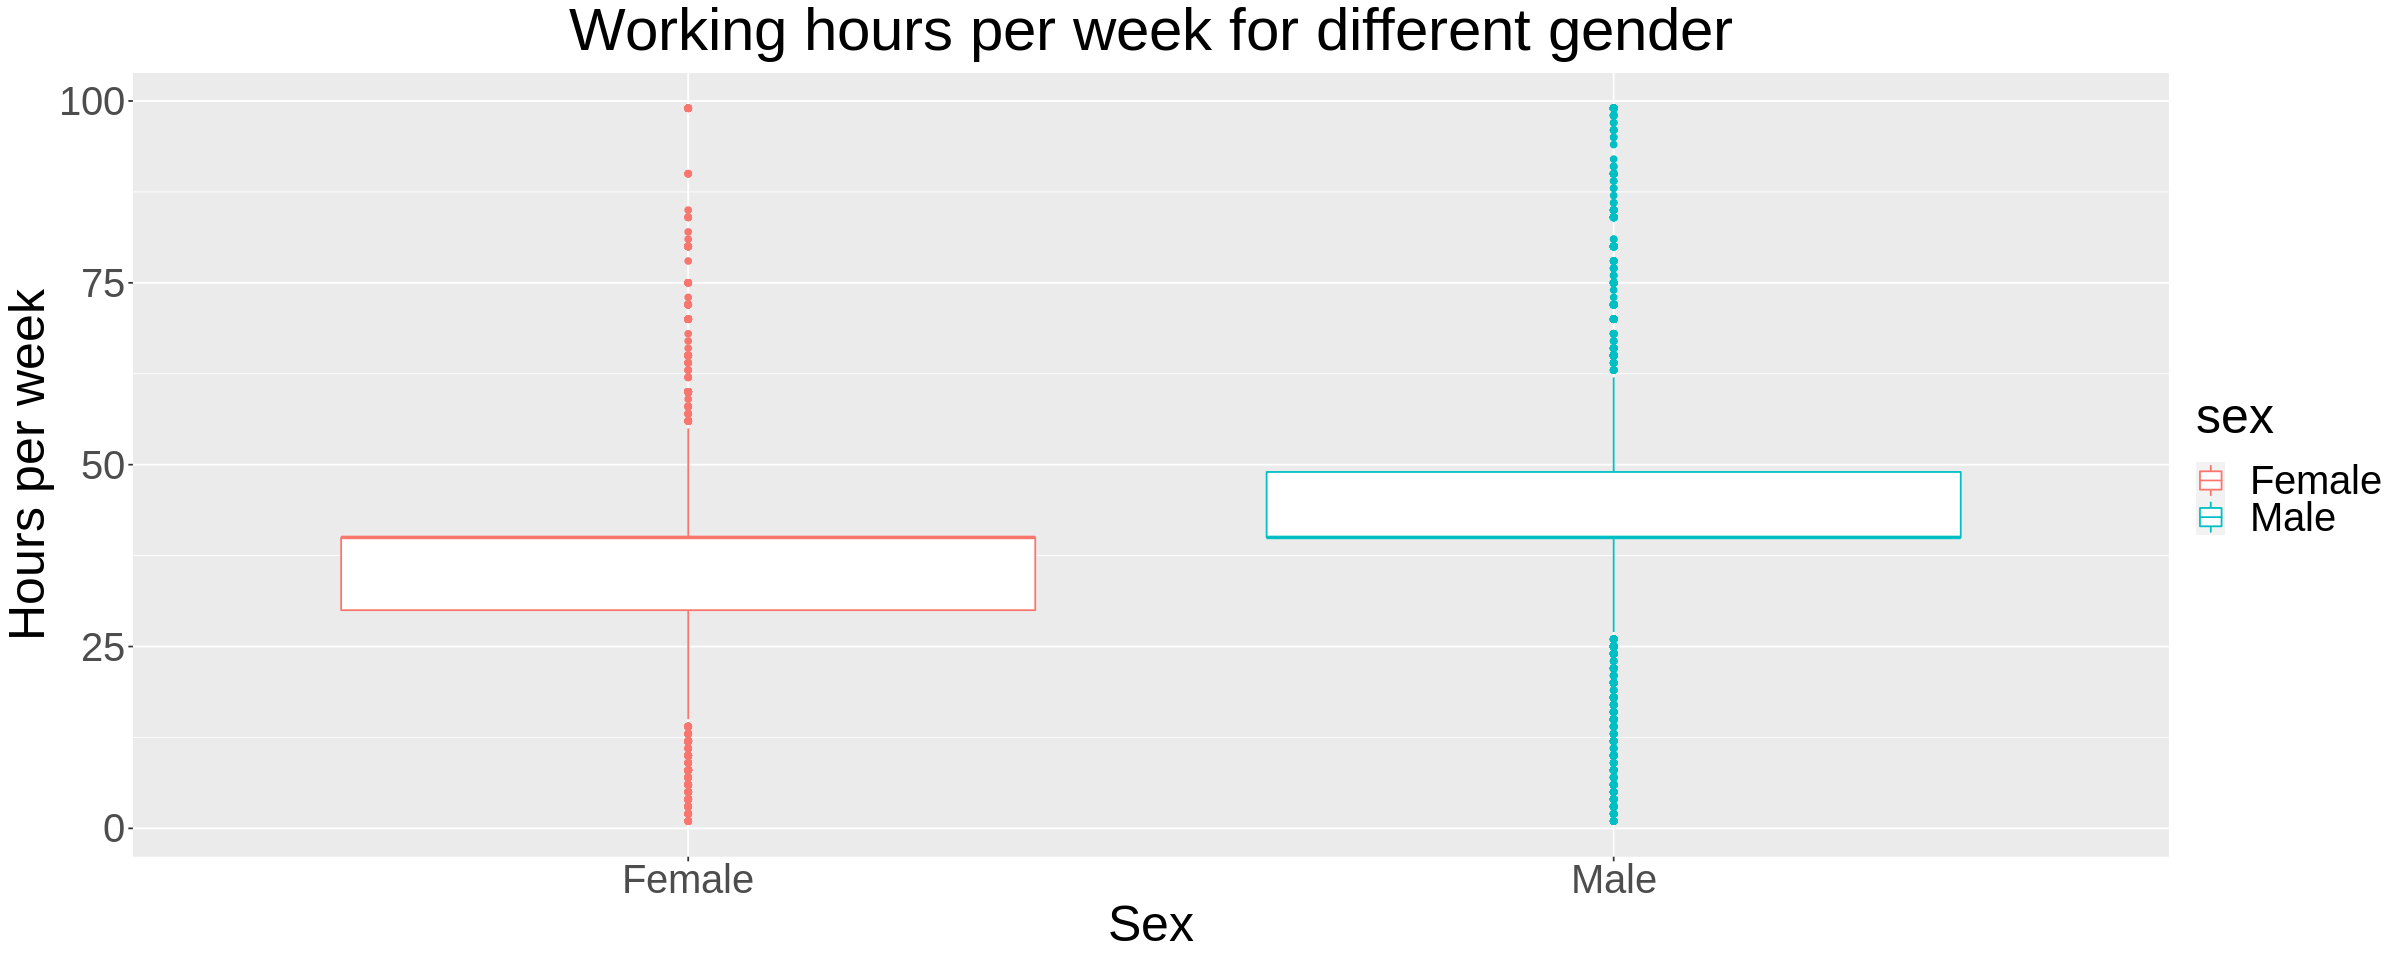

In [5]:
sex_hpw_plot <- 
    adult_data %>%
    ggplot(aes(x = sex, y = hours_per_week, color = sex)) +
    geom_boxplot() +
    labs(x = "Sex", y = "Hours per week") +
    ggtitle("Working hours per week for different gender") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

sex_hpw_plot

*Figure 1.1 Working hours per week for different gender*

Then we use a boxplot to demonstrate the relationship between `relationship` and `hours_per_week`.

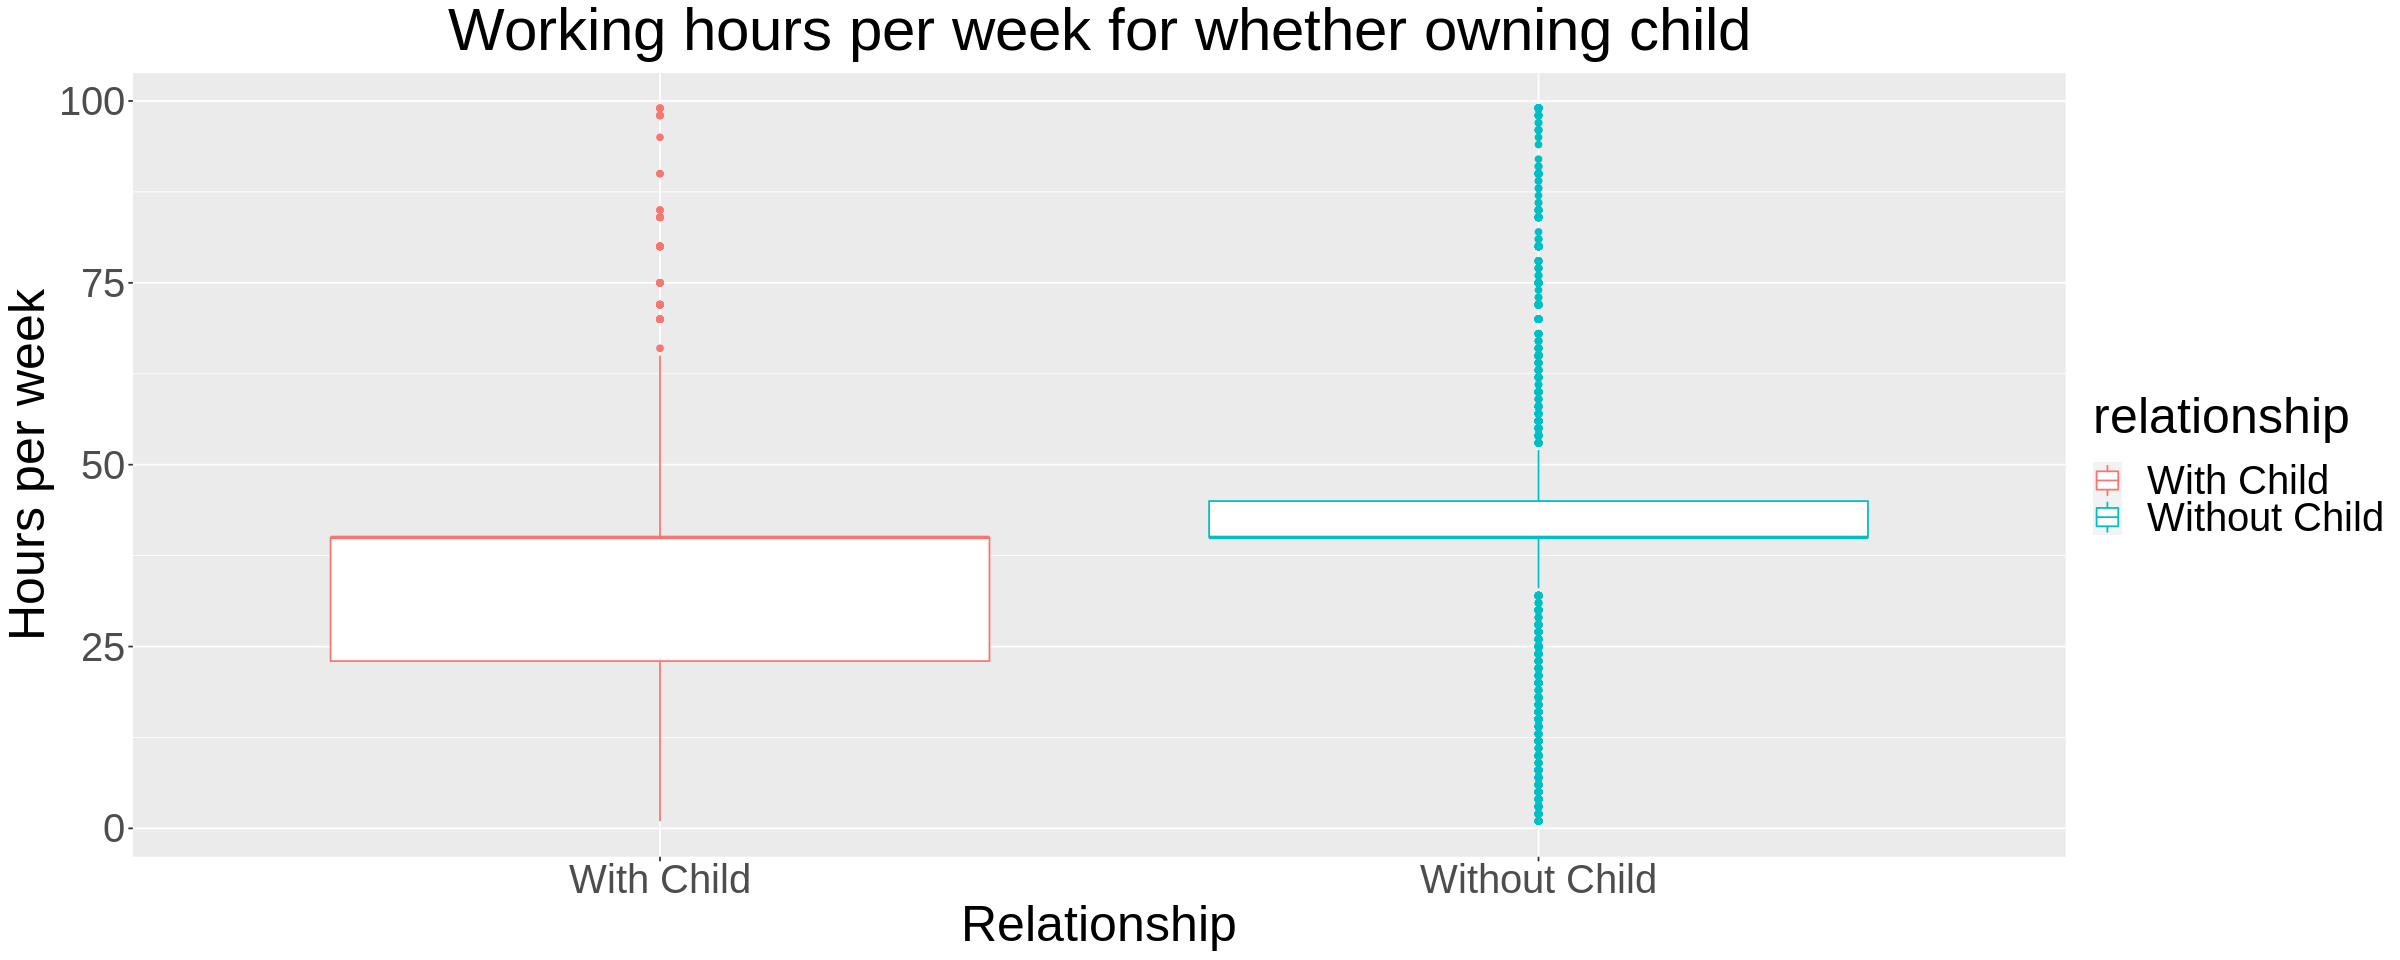

In [6]:
relationship_hpw_plot <- 
    adult_data %>%
    ggplot(aes(x = relationship, y = hours_per_week, color = relationship)) +
    geom_boxplot() +
    labs(x = "Relationship", y = "Hours per week") +
    ggtitle("Working hours per week for whether owning child") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

relationship_hpw_plot

*Figure 1.2 Working hours per week for whether owning child*

We also need a histogram to show the distribution of working hours per week.

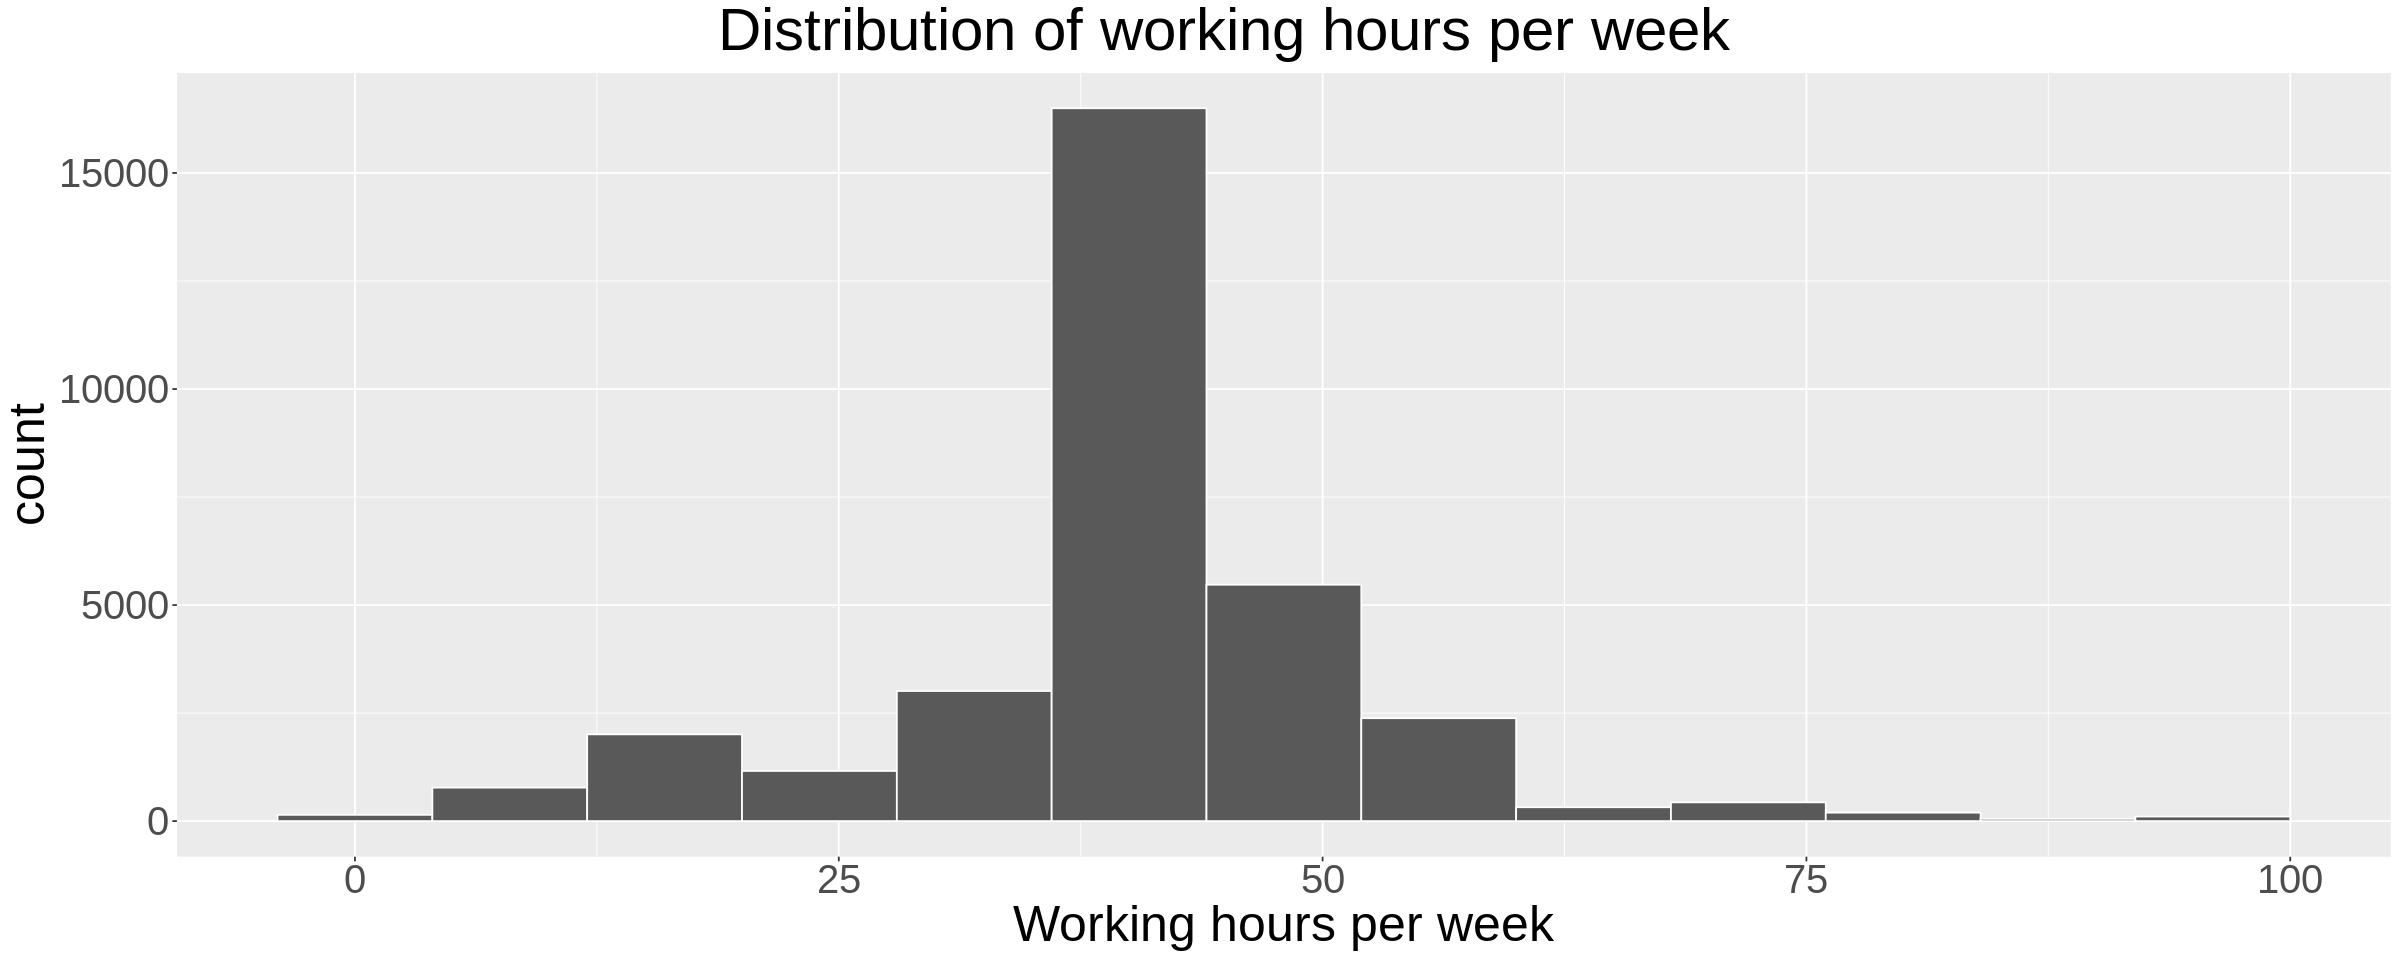

In [7]:
hpw_dist <-
    adult_data %>%
    ggplot(aes(x = hours_per_week)) +
    geom_histogram(binwidth = 8, color = "white") +
    labs(x = "Working hours per week") +
    ggtitle("Distribution of working hours per week") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.45))

options(repr.plot.width = 20, repr.plot.height = 8)

hpw_dist

*Figure 1.3 Distribution of working hours per week*

#### Statistics of Data

We compute the mean and standard deviation of working hours per week based on gender.

In [8]:
sex_hpw <- 
    adult_data %>%
    select(sex, hours_per_week) %>%
    group_by(sex) %>%
    summarize(mean = mean(hours_per_week),
              sd = sd(hours_per_week))

sex_hpw

sex,mean,sd
<chr>,<dbl>,<dbl>
Female,36.41036,11.81130
Male,42.42809,12.11976


*Table 1.4 The mean and standard deviation of working hours per week based on gender*

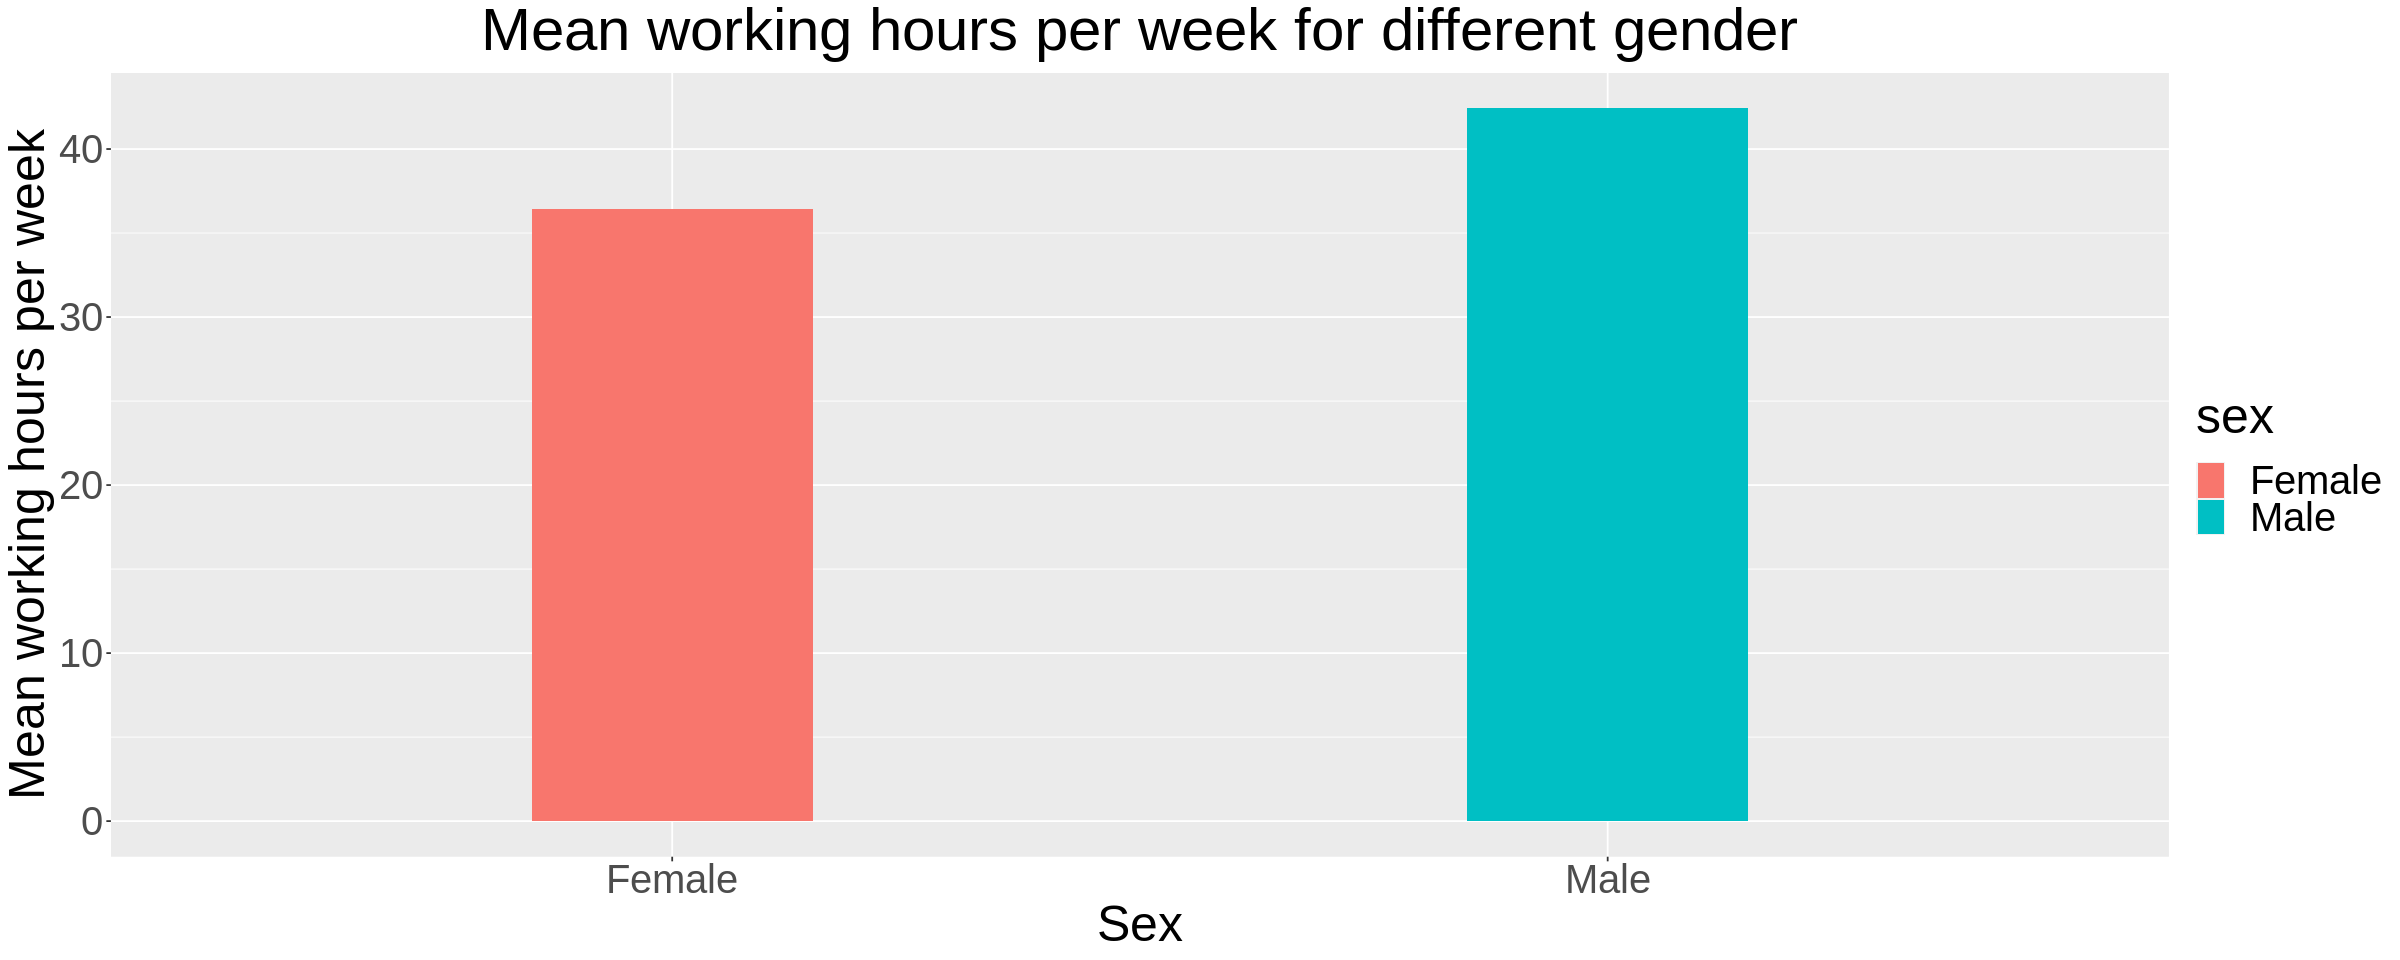

In [9]:
sex_hpw_mean_plot <- 
    sex_hpw %>%
    ggplot(aes(x = sex, y = mean, fill = sex)) +
    geom_bar(stat = "identity", width = 0.3) +
    labs(x = "Sex", y = "Mean working hours per week") +
    ggtitle("Mean working hours per week for different gender") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

sex_hpw_mean_plot

*Figure 1.4 Bar chart of mean working hours per week for different gender*

We compute the mean and standard deviation of working hours per week based on relationship.

In [10]:
relationship_hpw <-
    adult_data %>%
    select(relationship, hours_per_week) %>%
    group_by(relationship) %>%
    summarize(mean = mean(hours_per_week),
             sd = sd(hours_per_week))

relationship_hpw

relationship,mean,sd
<chr>,<dbl>,<dbl>
With Child,33.26934,12.76535
Without Child,41.75881,11.80306


*Table 1.5 The mean and standard deviation of working hours per week based on relationship*

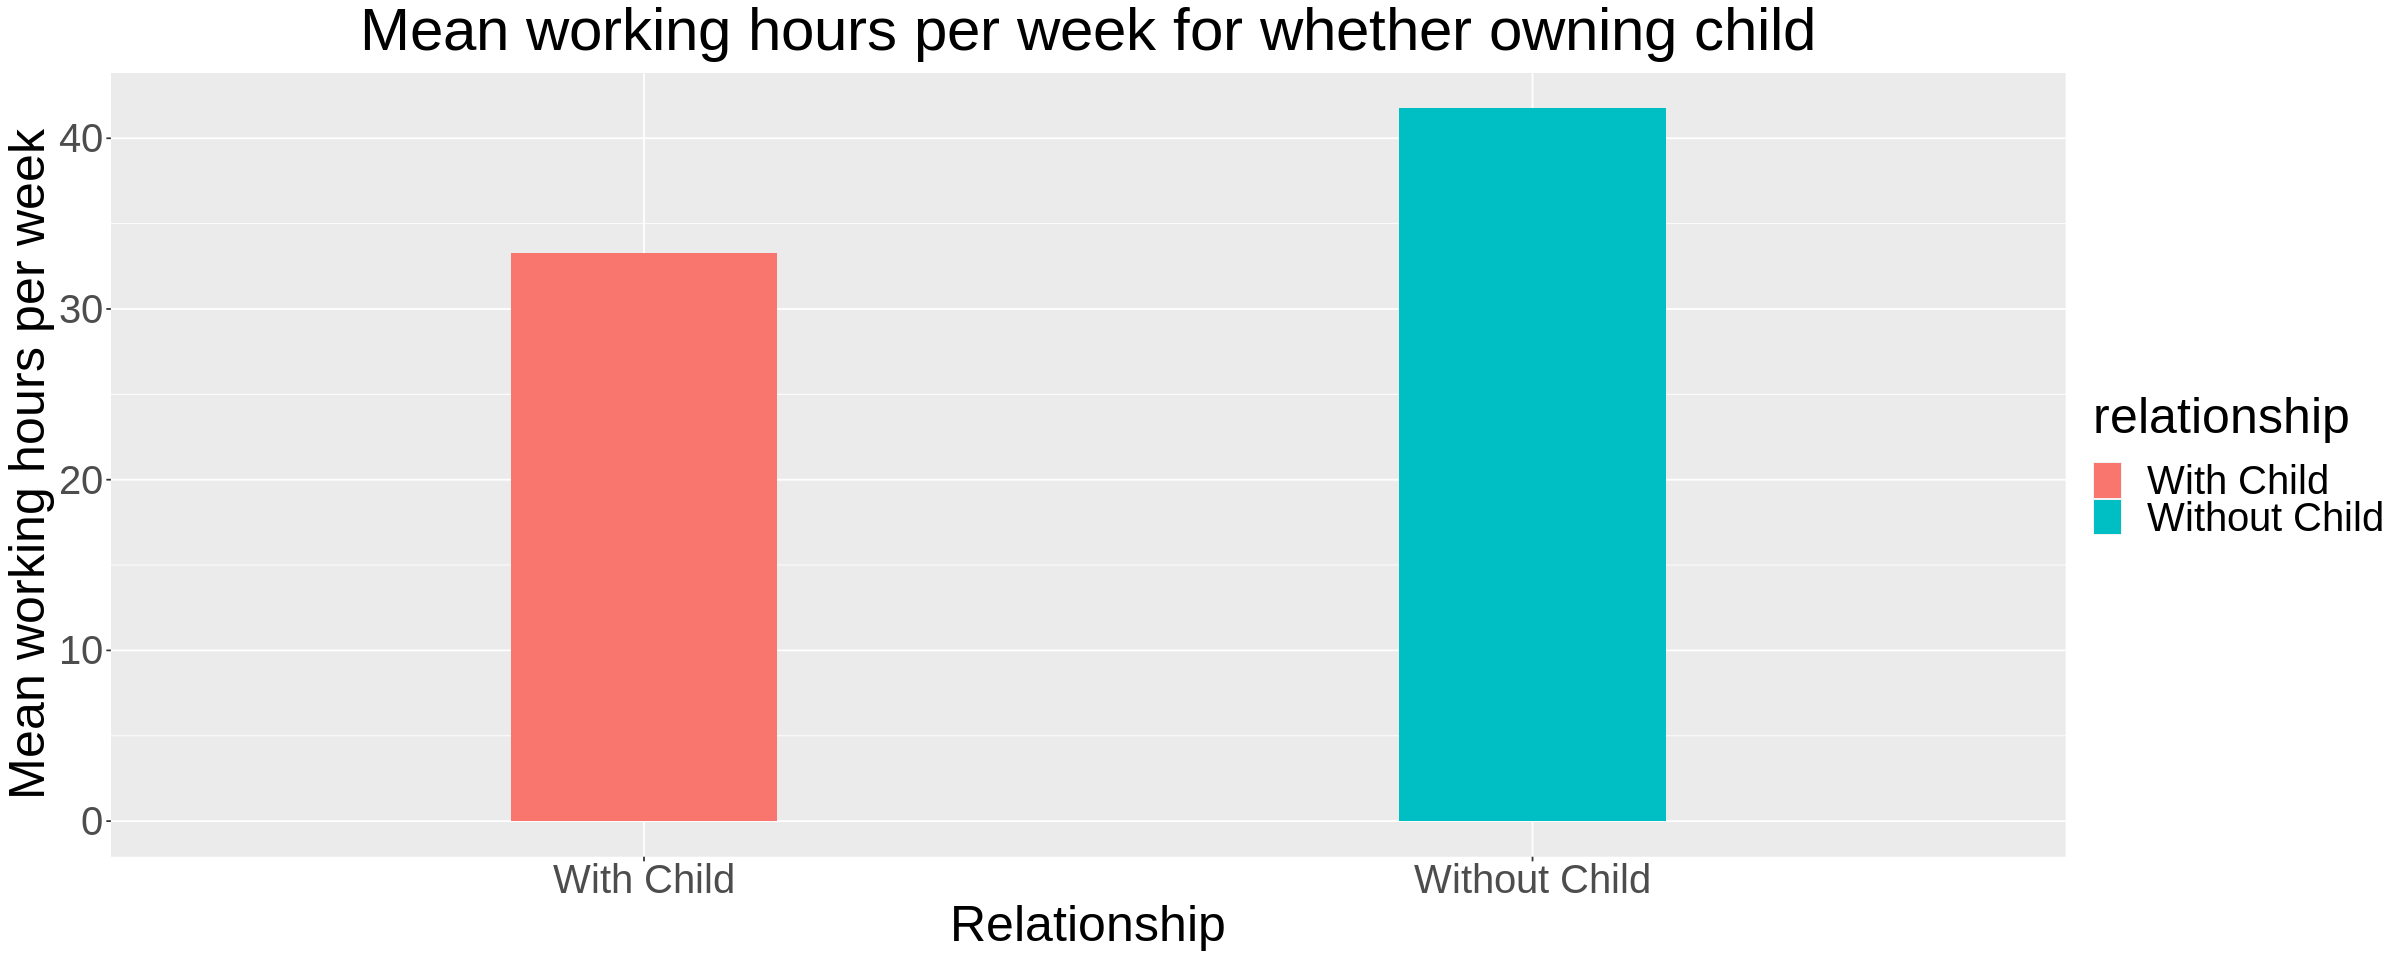

In [11]:
relationship_hpw_mean_plot <- 
    relationship_hpw %>%
    ggplot(aes(x = relationship, y = mean, fill = relationship)) +
    geom_bar(stat = "identity", width = 0.3) +
    labs(x = "Relationship", y = "Mean working hours per week") +
    ggtitle("Mean working hours per week for whether owning child") +
    theme(text = element_text(size = 30)) +
    theme(plot.title = element_text(hjust = 0.5))

options(repr.plot.width = 20, repr.plot.height = 8)

relationship_hpw_mean_plot

*Figure 1.5 Bar chart of mean working hours per week for whether owning child*

### The relationship between gender and the working hours per week

First, we want to look at the two plots of working hours per week for different gender from our preliminary results.

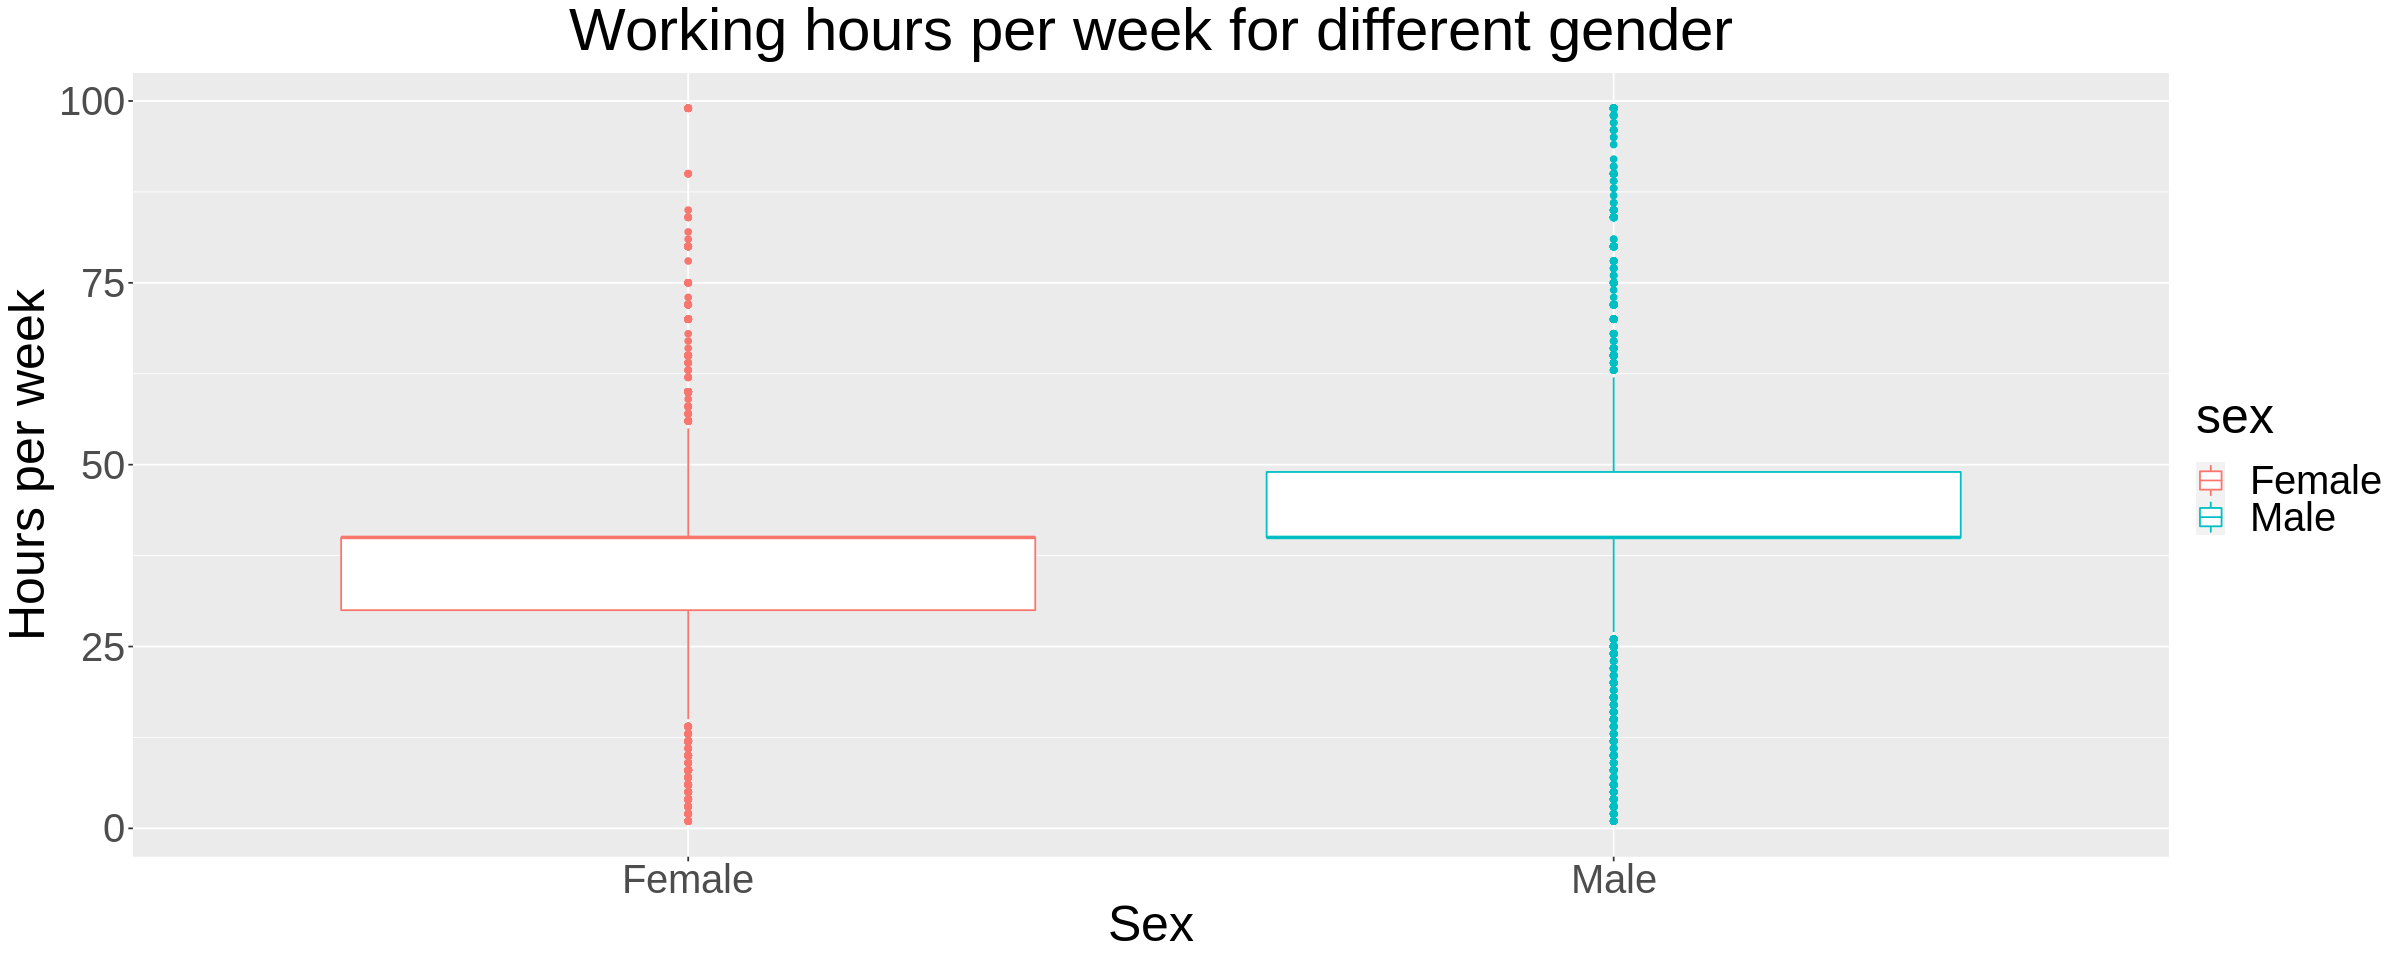

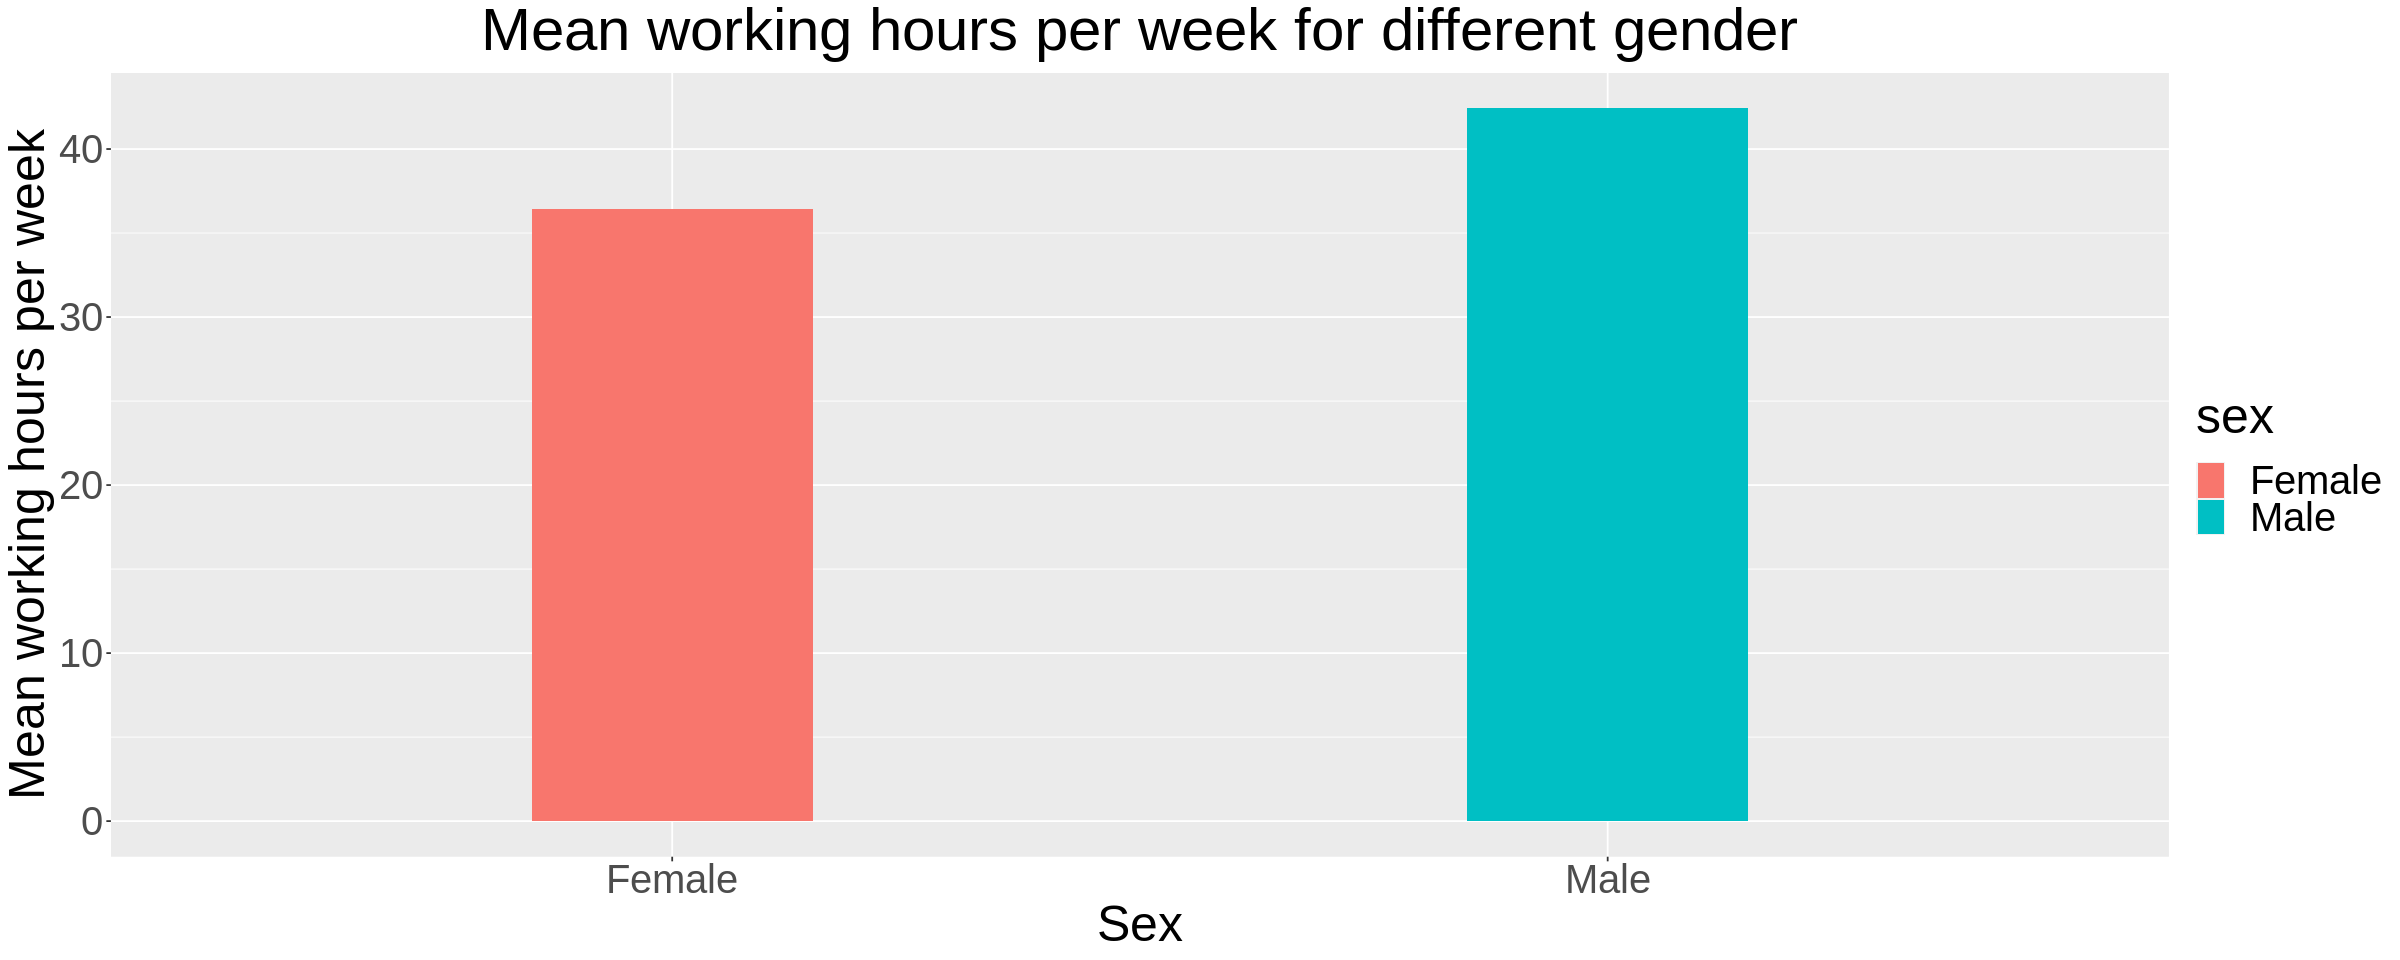

In [12]:
sex_hpw_plot
sex_hpw_mean_plot

For the relationship between working hours per week for different gender:

- From the first graph, we observed that the median of male and female has the same value of 40 hours. However, the female’s median (50% percentile) equals its upper interquartile (75 percentile) range while the male’s median(50% percentile) equals its lower interquartile(25 percentile) range.  
- From the second graph, we found that the mean of working hours for men to be larger (42.42809 hours) than the female’s working hours (36.41036 hours). 
- Since we do not maintain clear evidence of the different working hours for different gender, we need to utilize hypothesis tests to further prove our statement.


#### Hypothesis Test

By using hypothesis test, we want to see whether male's mean weekly working hours is different from female's mean weekly working hours at 5% significance level. Let $\mu_1$ be the mean working hours per week for male, and $\mu_2$ be the mean working hours per week for female.

So we have:

$H_0$: $\mu_1 = \mu_2$

$H_1$: $\mu_1 \neq \mu_2$

Below we obtain the sample mean and save it as `sex_obs_stat` and simulate from the null model `sex_null_model`.

In [13]:
set.seed(50)

# We take one sample from the population
sex_sample <- 
    adult_data %>%
    rep_sample_n(size = 1000, reps = 1, replace = F) %>%
    select(sex, hours_per_week)

# We obtain the observed statistic from the sample we took
sex_obs_stat <-
    sex_sample %>%
    specify(formula = hours_per_week ~ sex) %>%
    calculate(stat = "diff in means", order = c("Male", "Female"))

# We get the null model 
sex_null_model <- 
    sex_sample %>%
    specify(formula = hours_per_week ~ sex) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Male", "Female"))
    
head(sex_null_model)

Adding missing grouping variables: `replicate`


replicate,stat
<int>,<dbl>
1,0.6472837
2,-0.9353943
3,0.8231369
4,-1.7921146
5,0.8547002
6,-1.5305894


*Table 1.6 Difference in mean working hours per week for male and female under null model*

Then, we want to  plot the result of hypothesis test and we call it `sex_result_plot`.

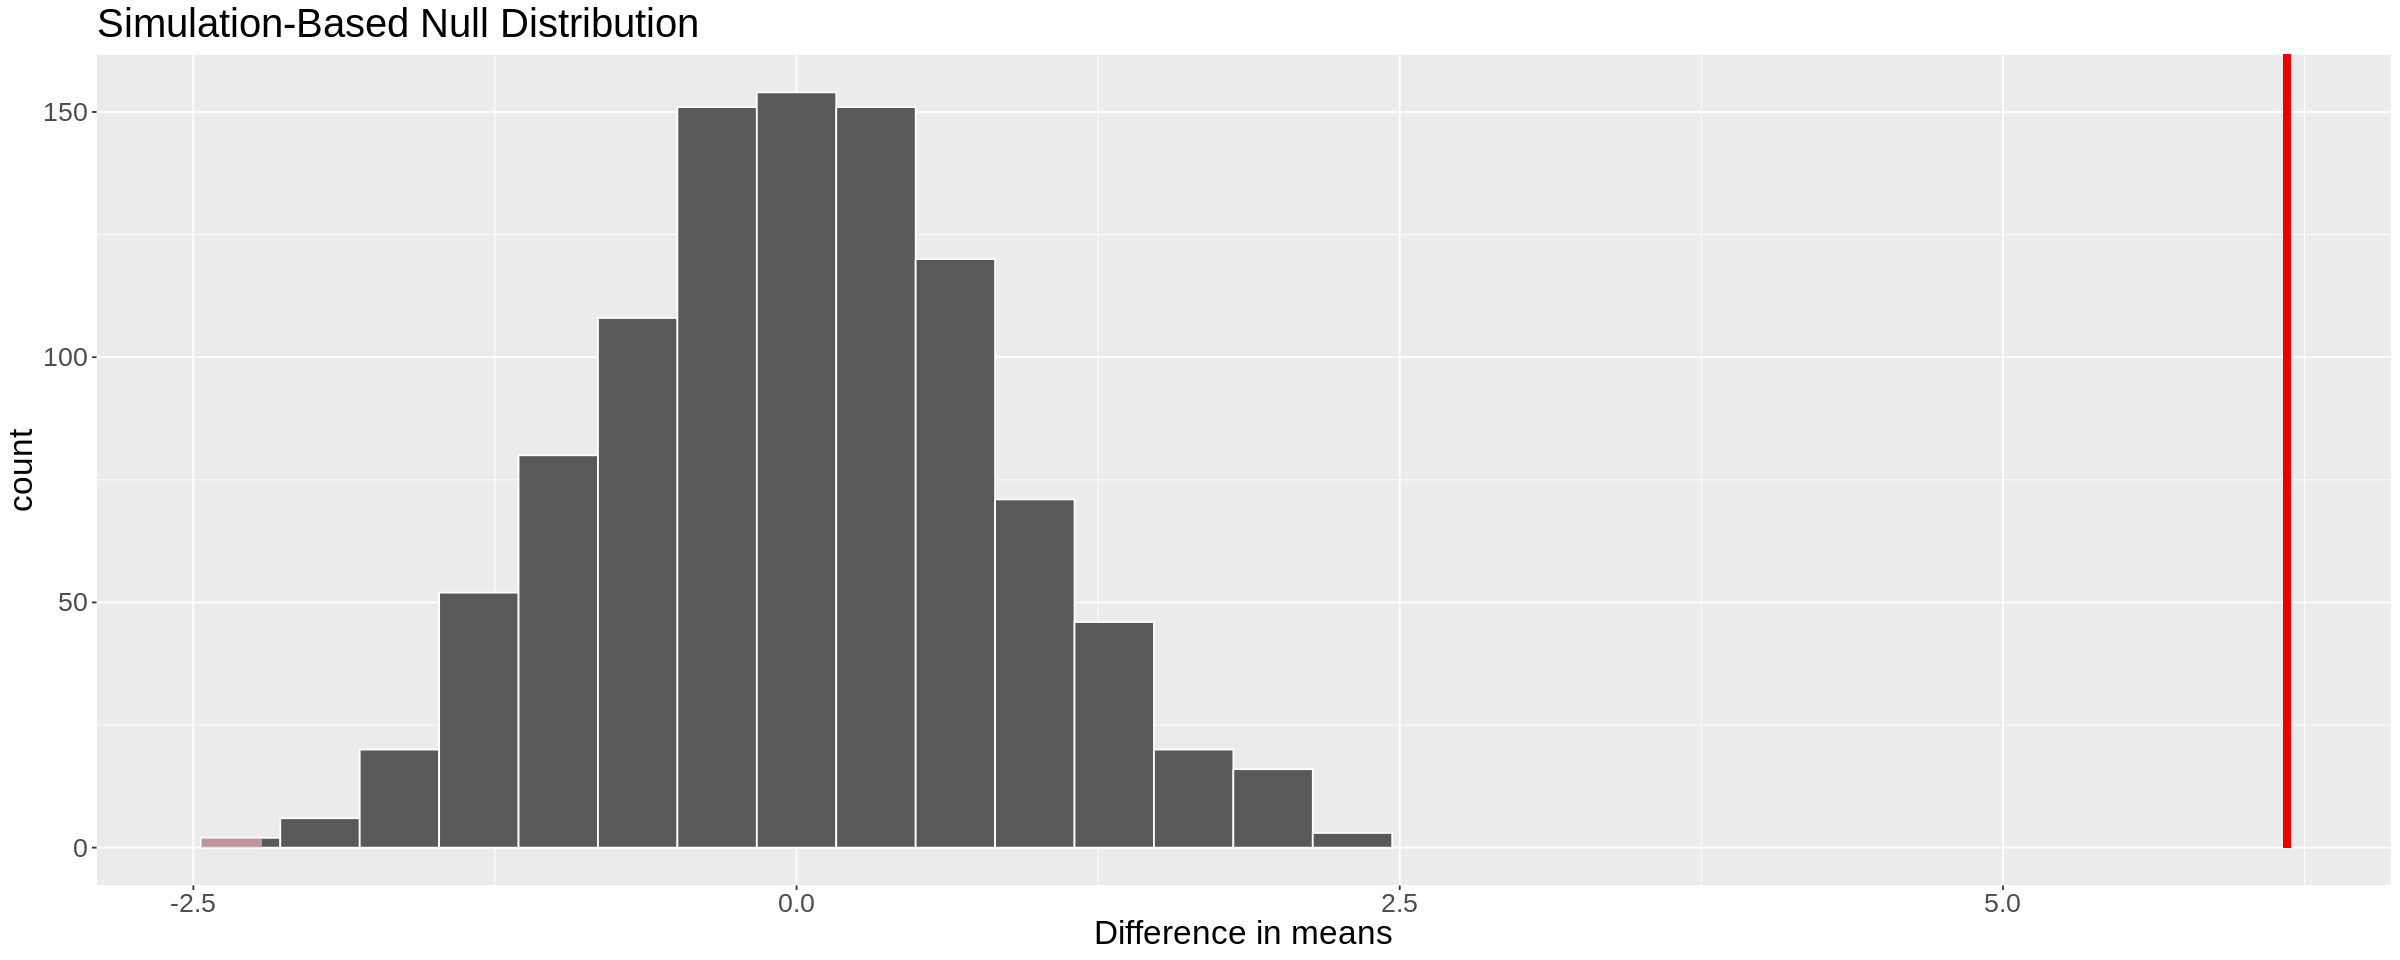

In [14]:
sex_result_plot <- 
    sex_null_model %>%
    visualize() +
    xlab("Difference in means") +
    shade_p_value(obs_stat = sex_obs_stat$stat, direction = "both") +
    theme(text = element_text(size = 20))

sex_result_plot

*Figure 1.6 The plot of null distribution for difference in mean working hours per week for male and female*

We then obtain the p-value from `sex_null_model` and we call it `sex_p_value`.

In [15]:
sex_p_value <- 
    sex_null_model %>%
    get_p_value(obs_stat = sex_obs_stat$stat, direction = "both") %>%
    pull()

sex_p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] 0

We would never report a p-value of 0 since this suggests that making a Type I error is impossible. Instead, we report the p-value as the p-value is < 0.001 as we are using 1000 repetitions to calculate the sample.

Therefore, we can conclude that given p-value is < 0.001 we reject the null hypothesis at the 5% significance level based on the results of the hypothesis test, which is saying, we reject at 5% significance the null hypothesis that the mean working hours per week is the same for male and female. We can also interpret the result as it would be unlikely to observe a difference in the average working hours per week of 5.76 if both male and female have the same mean weekly working hours.

#### Bootstrapping and Confidence Interval

We would like to find the 95% confidence interval for the difference in mean working hours per week for male and female and we call it `sex_bootstrapping_diff_in_mean_ci`.

In [16]:
set.seed(50)

sex_sample <- 
    adult_data %>%
    rep_sample_n(size = 1000, reps = 1, replace = F) %>%
    select(sex, hours_per_week)

sex_bootstrapping_diff_in_mean <-
    sex_sample %>%
    specify(formula = hours_per_week ~ sex) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Male", "Female"))

sex_bootstrapping_diff_in_mean_ci <-
    sex_bootstrapping_diff_in_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")

sex_bootstrapping_diff_in_mean_ci

Adding missing grouping variables: `replicate`


lower_ci,upper_ci
<dbl>,<dbl>
4.560302,7.615756


*Table 1.7 The 95% confidence interval for bootstrap distribution of difference in mean working hours per week for male and female*

Then we want to visualize the confidence interval `sex_bootstrapping_diff_in_mean_ci` with the bootstrap distribution `sex_bootstrapping_diff_in_mean`, and we call the plot `sex_bootstrapping_diff_in_mean_plot`.

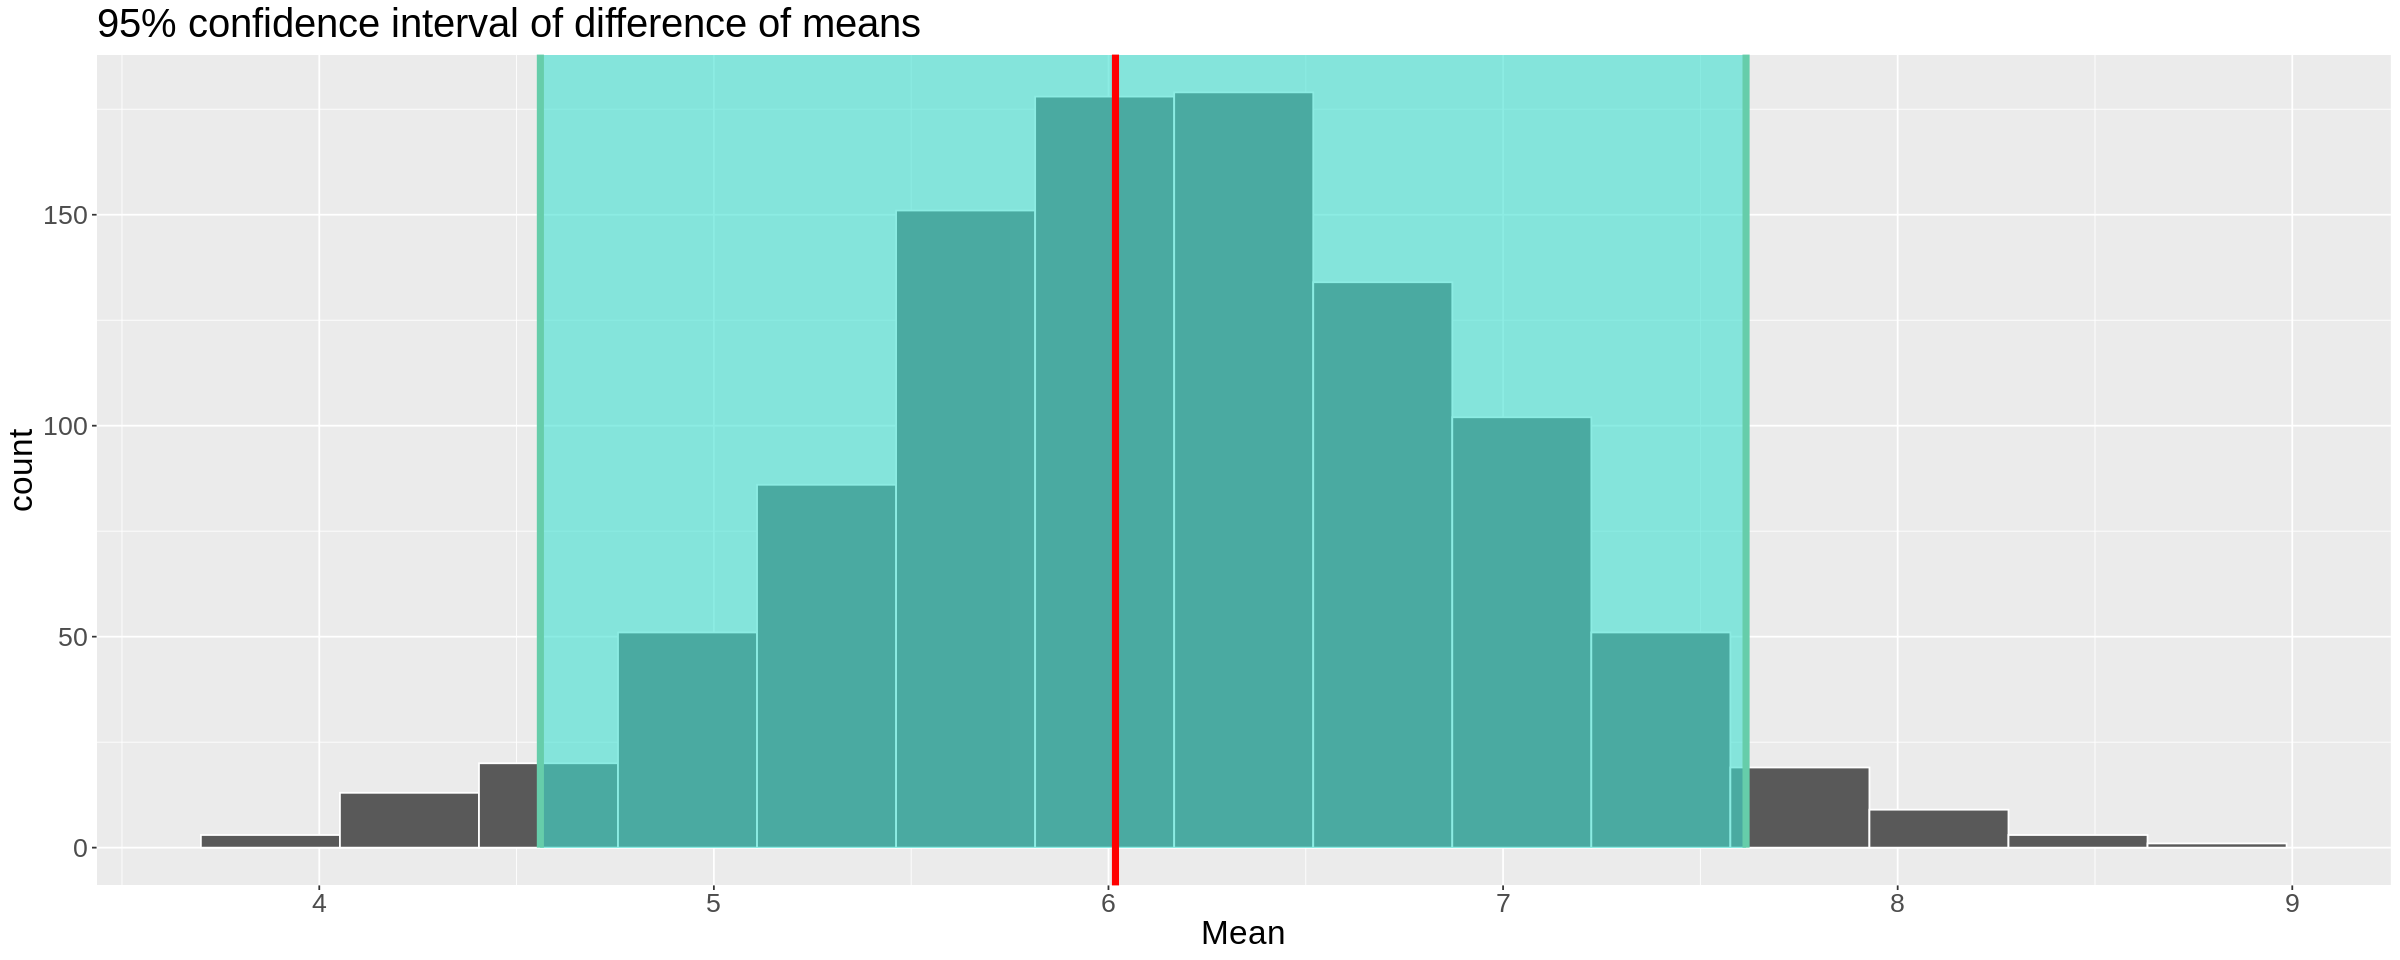

In [17]:
sex_true_diff <- 
    sex_hpw$mean[2] - sex_hpw$mean[1]

sex_bootstrapping_diff_in_mean_plot <-
    sex_bootstrapping_diff_in_mean %>%
    visualize() +
    shade_confidence_interval(endpoints = sex_bootstrapping_diff_in_mean_ci) +
    theme(text = element_text(size = 20)) +
    xlab("Mean") +
    ggtitle("95% confidence interval of difference of means") +
    geom_vline(xintercept = sex_true_diff, colour = "red", size = 2)

sex_bootstrapping_diff_in_mean_plot

*Figure 1.7 Visualization of 95% confidence interval to the bootstrap distribution of difference in mean working hours per week for male and female*

We also want to look at the 95% confidence interval for the mean working hours per week for male and female repectively. We call them `bootstrap_male_ci` and `bootstrap_female_ci`.

In [18]:
set.seed(50)

# We first look at bootstrap dist for mean working hours per week for male
bootstrap_male <- 
    sex_sample %>%
    filter(sex == "Male") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean") 

# Get 95% confidence interval from bootstrap_male
bootstrap_male_ci <- 
    bootstrap_male %>%
    get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_male_ci

# We then look at bootstrap dist for mean working hours per week for female
bootstrap_female <- 
    sex_sample %>%
    filter(sex == "Female") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")  

# Get 95% confidence interval from bootstrap_female
bootstrap_female_ci <-
    bootstrap_female %>%
    get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_female_ci

lower_ci,upper_ci
<dbl>,<dbl>
41.47406,43.32055


lower_ci,upper_ci
<dbl>,<dbl>
34.99375,37.40361


*Table 1.8 The 95% confidence interval for bootstrap distribution of mean working hours per week for male and female respectively*

#### CLT and Confidence Interval

There are 3 pre-conditions in order to utilize the Central Limit Theorem Method：
1. All the samples taken should be independent from the population. 
2. To achieve the independence of the sample’s variables, the sample size must be less than 10% of the population size. 
3. Sample size must be large enough (at least 30) to be representative of the whole population.

Since we have met all three conditions above, we can now obtain the 95% confidence interval for the mean working hours per week for male and female using Central Limit Theorem. We call them `clt_male_ci` and `clt_female_ci`. 

In [19]:
set.seed(50)

pop_sex <- adult_data %>% 
    select(sex, hours_per_week)

# We get sample for male and female respectively
sample_male <- pop_sex %>%
    filter(sex == "Male") %>%
    rep_sample_n(size = 1000, replace = F)

sample_female <- pop_sex %>%
    filter(sex == "Female") %>%
    rep_sample_n(size = 1000, replace = F)

# We compute the mean and standard error for each sample
male_sum <- sample_male %>%
    summarise(mean = mean(hours_per_week),
              se = sd(hours_per_week)/sqrt(nrow(sample_male)))

female_sum <- sample_female %>%
    summarise(mean = mean(hours_per_week),
              se = sd(hours_per_week)/sqrt(nrow(sample_female)))

# We obtain the 95% confidence interval using CLT 
clt_male_ci <- 
    tibble(
        lower_ci = qnorm(0.025, mean = male_sum$mean, sd = male_sum$se),
        upper_ci = qnorm(0.975, mean = male_sum$mean, sd = male_sum$se))
clt_male_ci

clt_female_ci <- 
    tibble(
        lower_ci = qnorm(0.025, mean = female_sum$mean, sd = female_sum$se),
        upper_ci = qnorm(0.975, mean = female_sum$mean, sd = female_sum$se))
clt_female_ci

lower_ci,upper_ci
<dbl>,<dbl>
41.47058,42.99942


lower_ci,upper_ci
<dbl>,<dbl>
35.35617,36.84983


*Table 1.9 The 95% confidence interval for the mean working hours per week for male and female using CLT*

#### Comparing Bootstrapping and CLT

Below shows the visualization of the bootstrap sampling distribution and Normal density given by CLT.

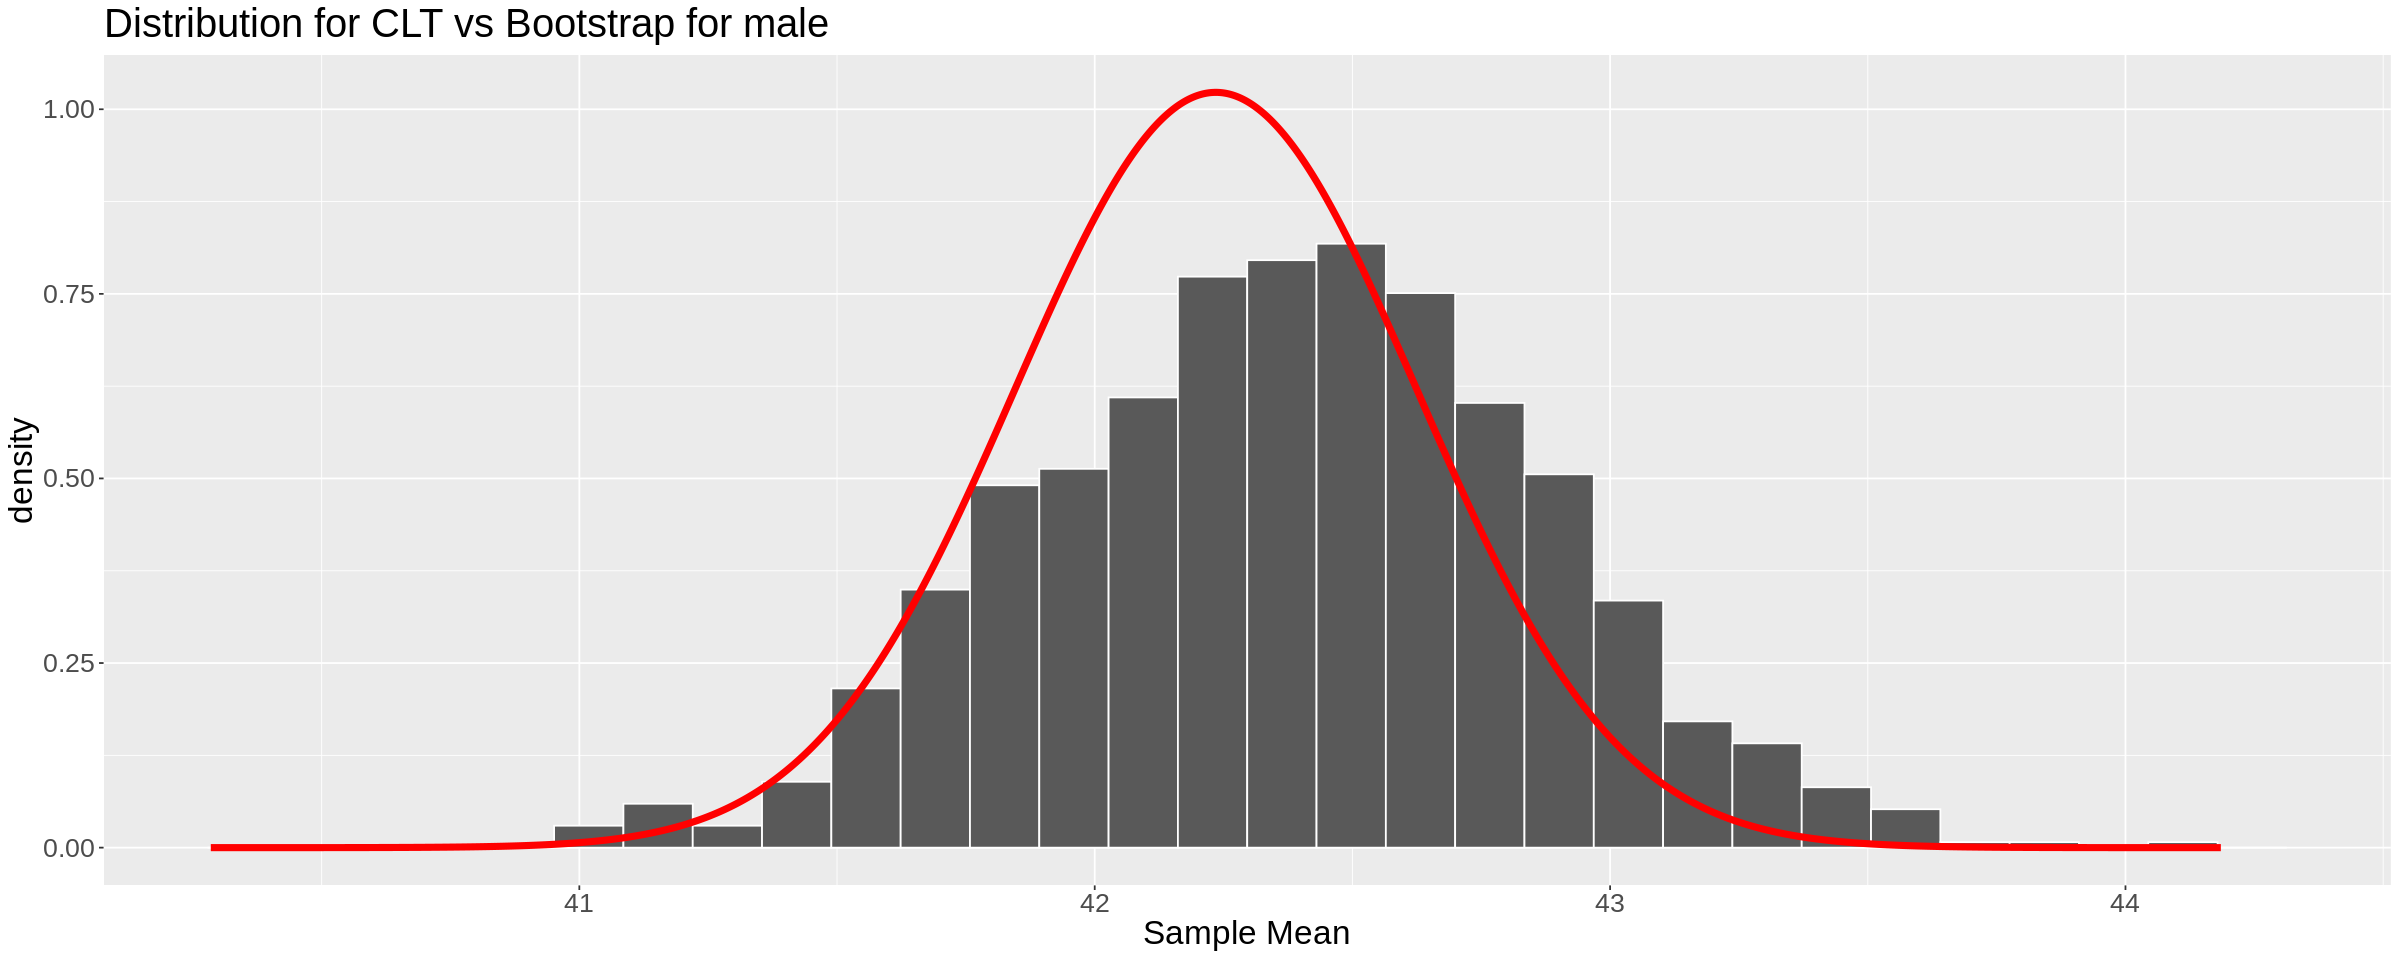

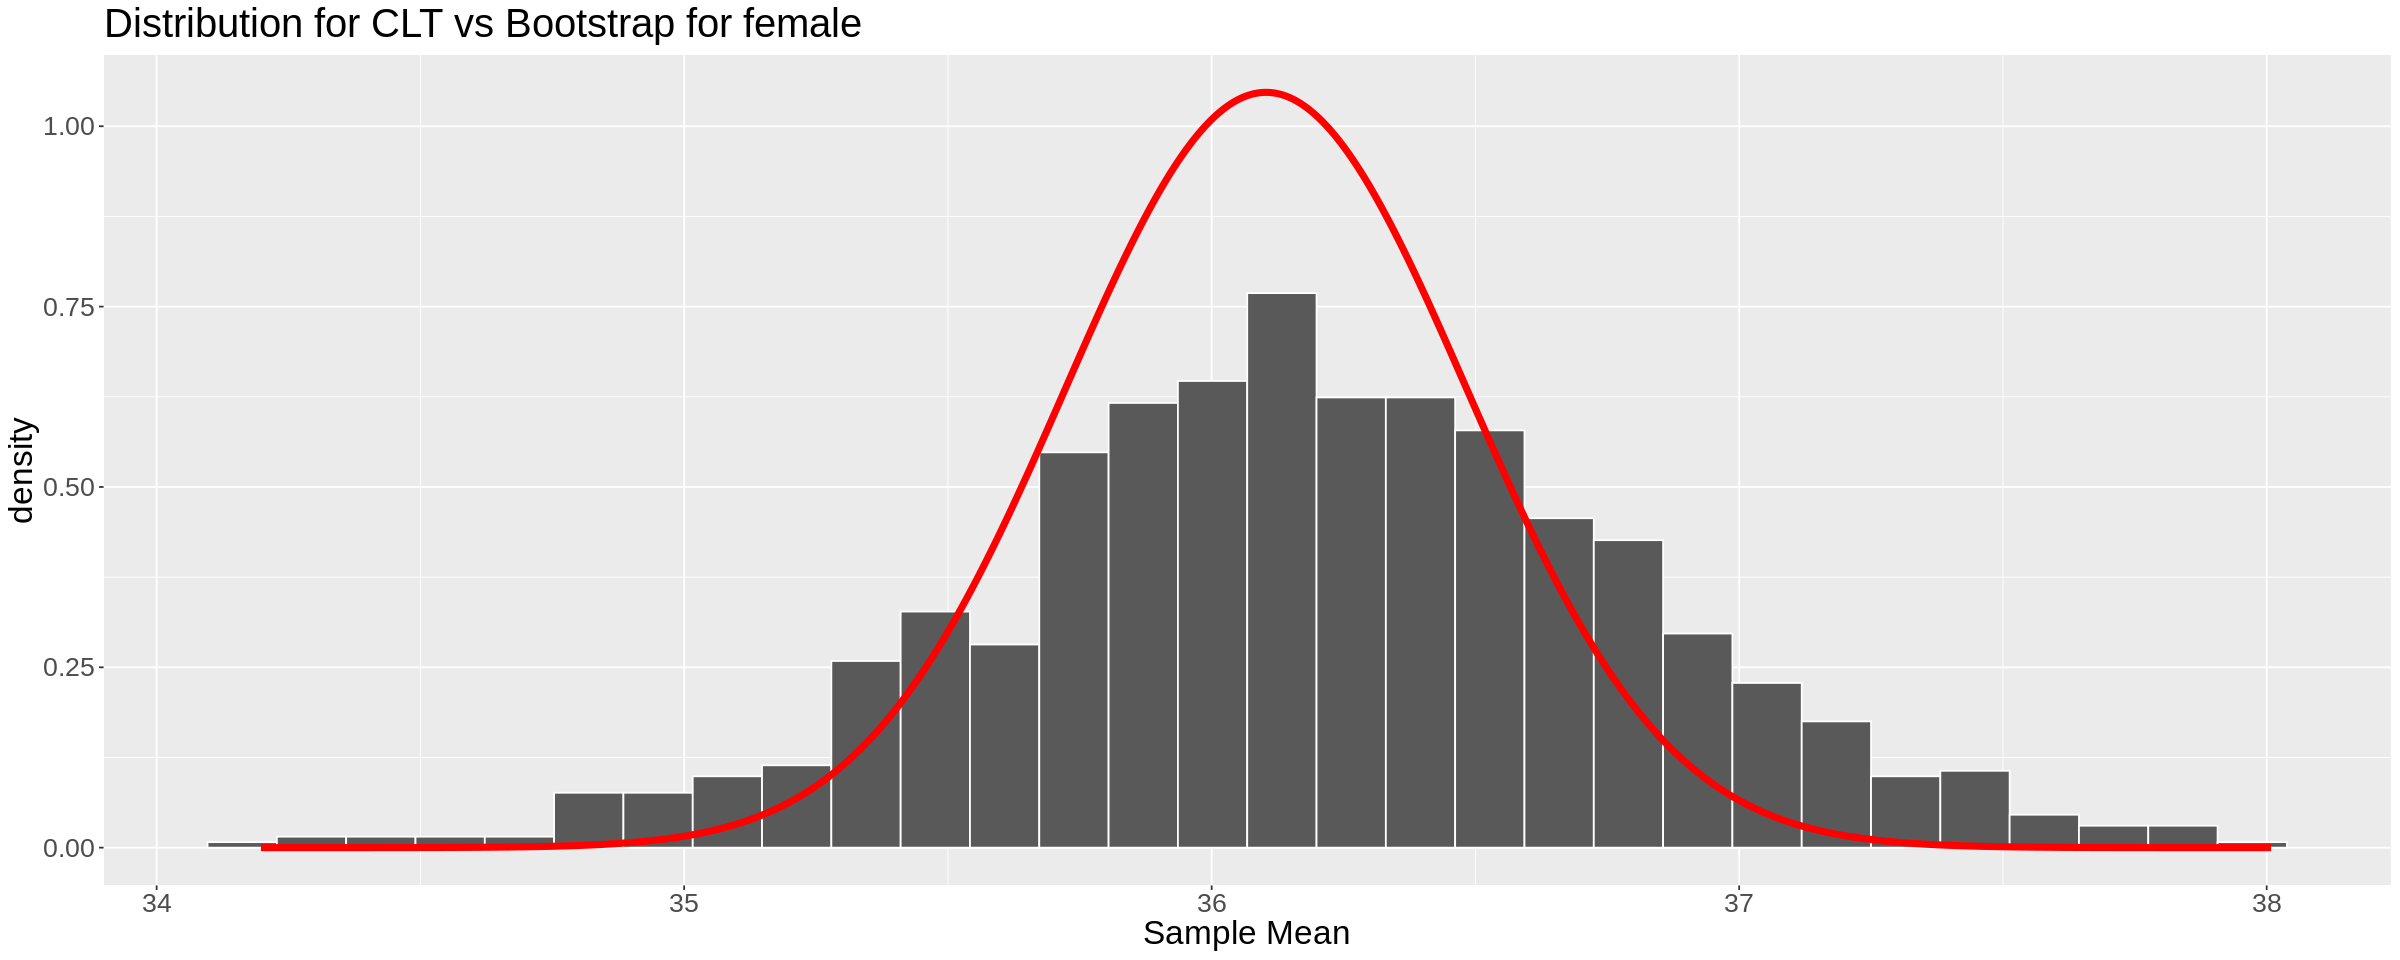

In [20]:
# Obtain sample mean for male and female
male_x_bar <- male_sum$mean
female_x_bar <- female_sum$mean

# Obtain the sample std error for male and female
male_std_error <- male_sum$se
female_std_error <- female_sum$se

# Get the normal curve
male_clt_samp_dist <- 
    tibble(x = seq(male_x_bar - 5 * male_std_error, 
                   male_x_bar + 5 * male_std_error, 0.0001),
           density = dnorm(x, male_x_bar, male_std_error))

female_clt_samp_dist <- 
    tibble(x = seq(female_x_bar - 5 * female_std_error, 
                   female_x_bar + 5 * female_std_error, 0.0001),
           density = dnorm(x, female_x_bar, female_std_error))

# Then we plot the bootstrap vs the CLT estimates
male_btsp_vs_clt_samp_dist_plot <- 
    bootstrap_male %>% 
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    geom_line(data = male_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    xlab("Sample Mean") + 
    ggtitle("Distribution for CLT vs Bootstrap for male") + 
    theme(text = element_text(size = 20))

female_btsp_vs_clt_samp_dist_plot <- 
    bootstrap_female %>% 
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    geom_line(data = female_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    xlab("Sample Mean") + 
    ggtitle("Distribution for CLT vs Bootstrap for female") + 
    theme(text = element_text(size = 20))

male_btsp_vs_clt_samp_dist_plot
female_btsp_vs_clt_samp_dist_plot

*Figure 1.8 Comparing the bootstrap sampling distribution with normal density given by CLT*

### The relationship between owning child and the working hours per week

First, we want to look at the two plots of working hours per week for whether owning child from our preliminary results.

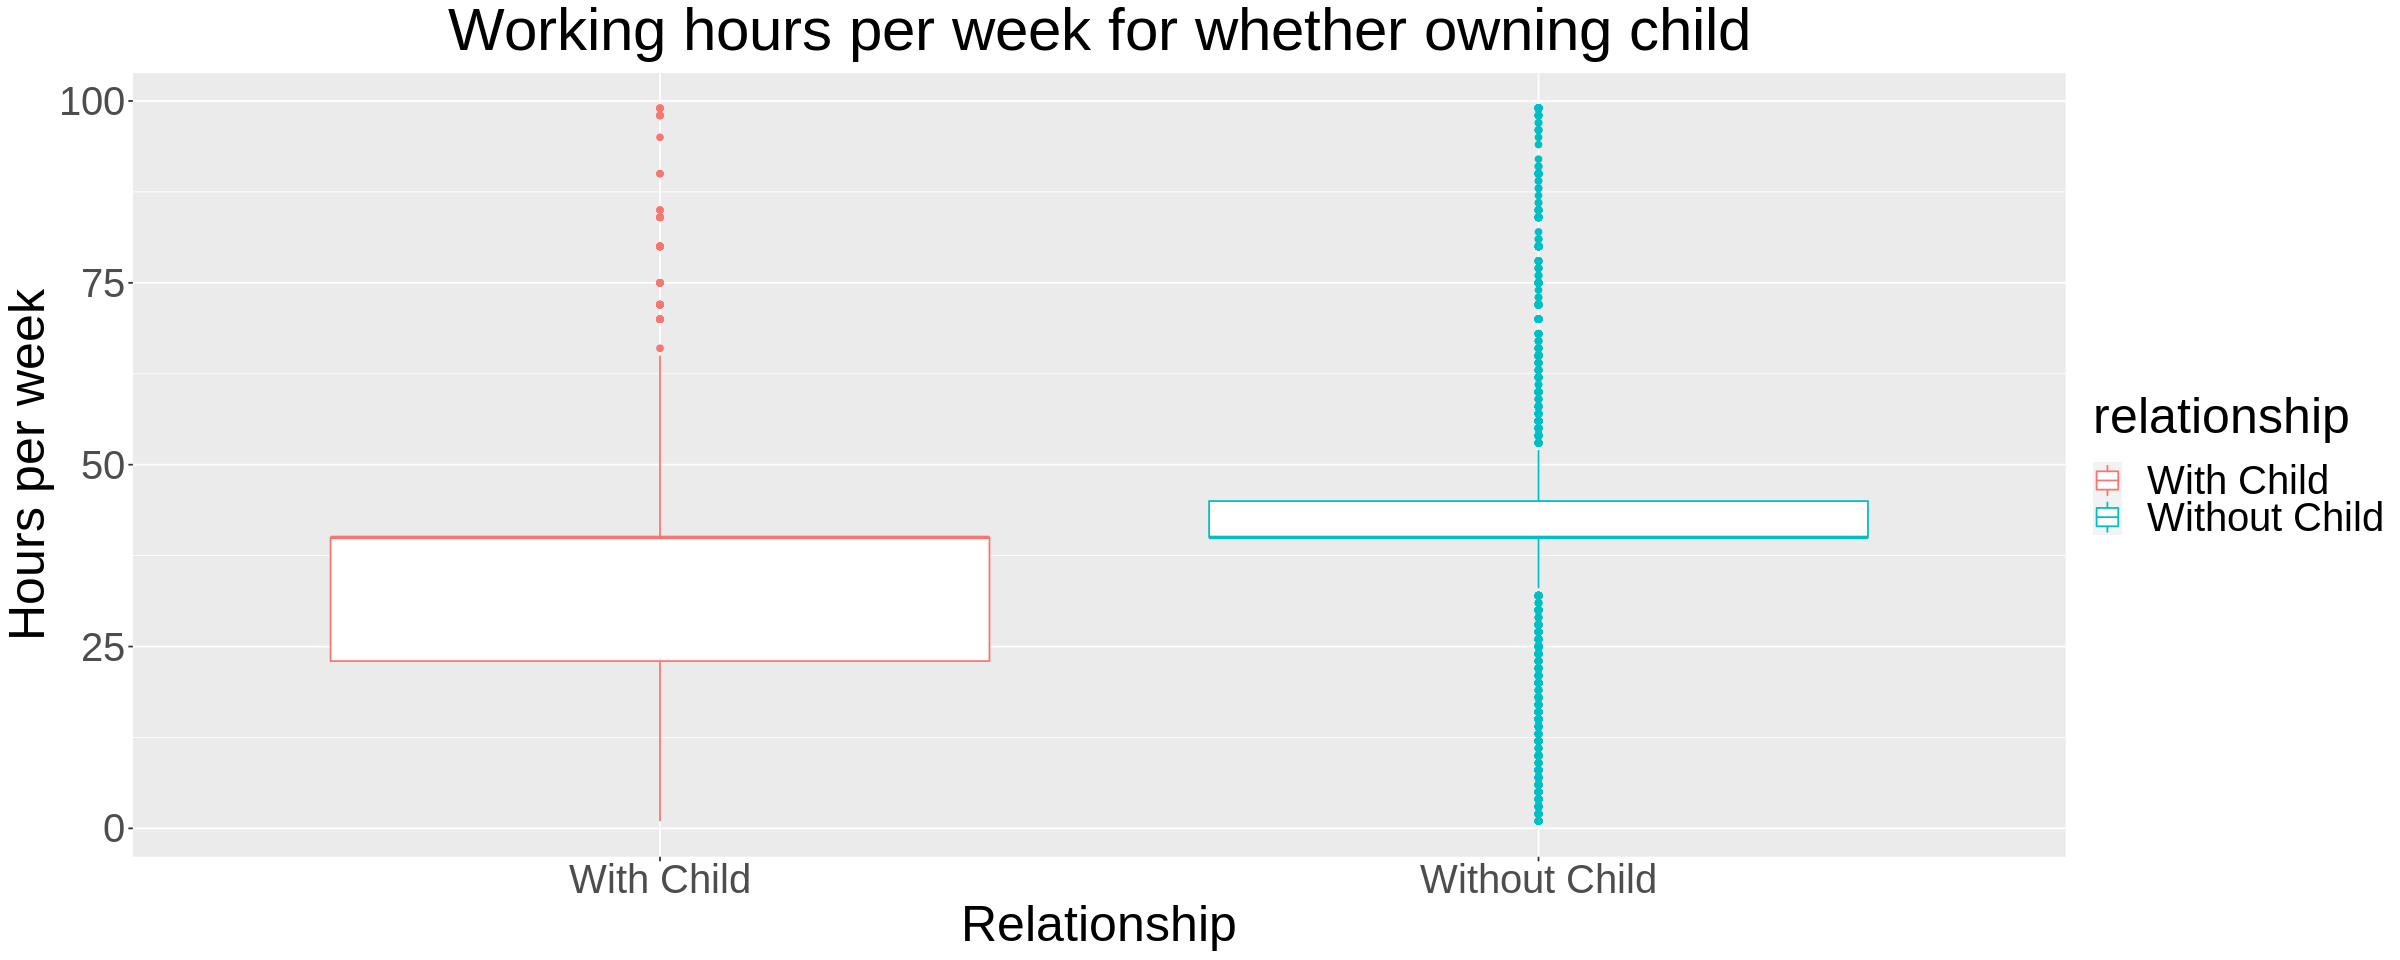

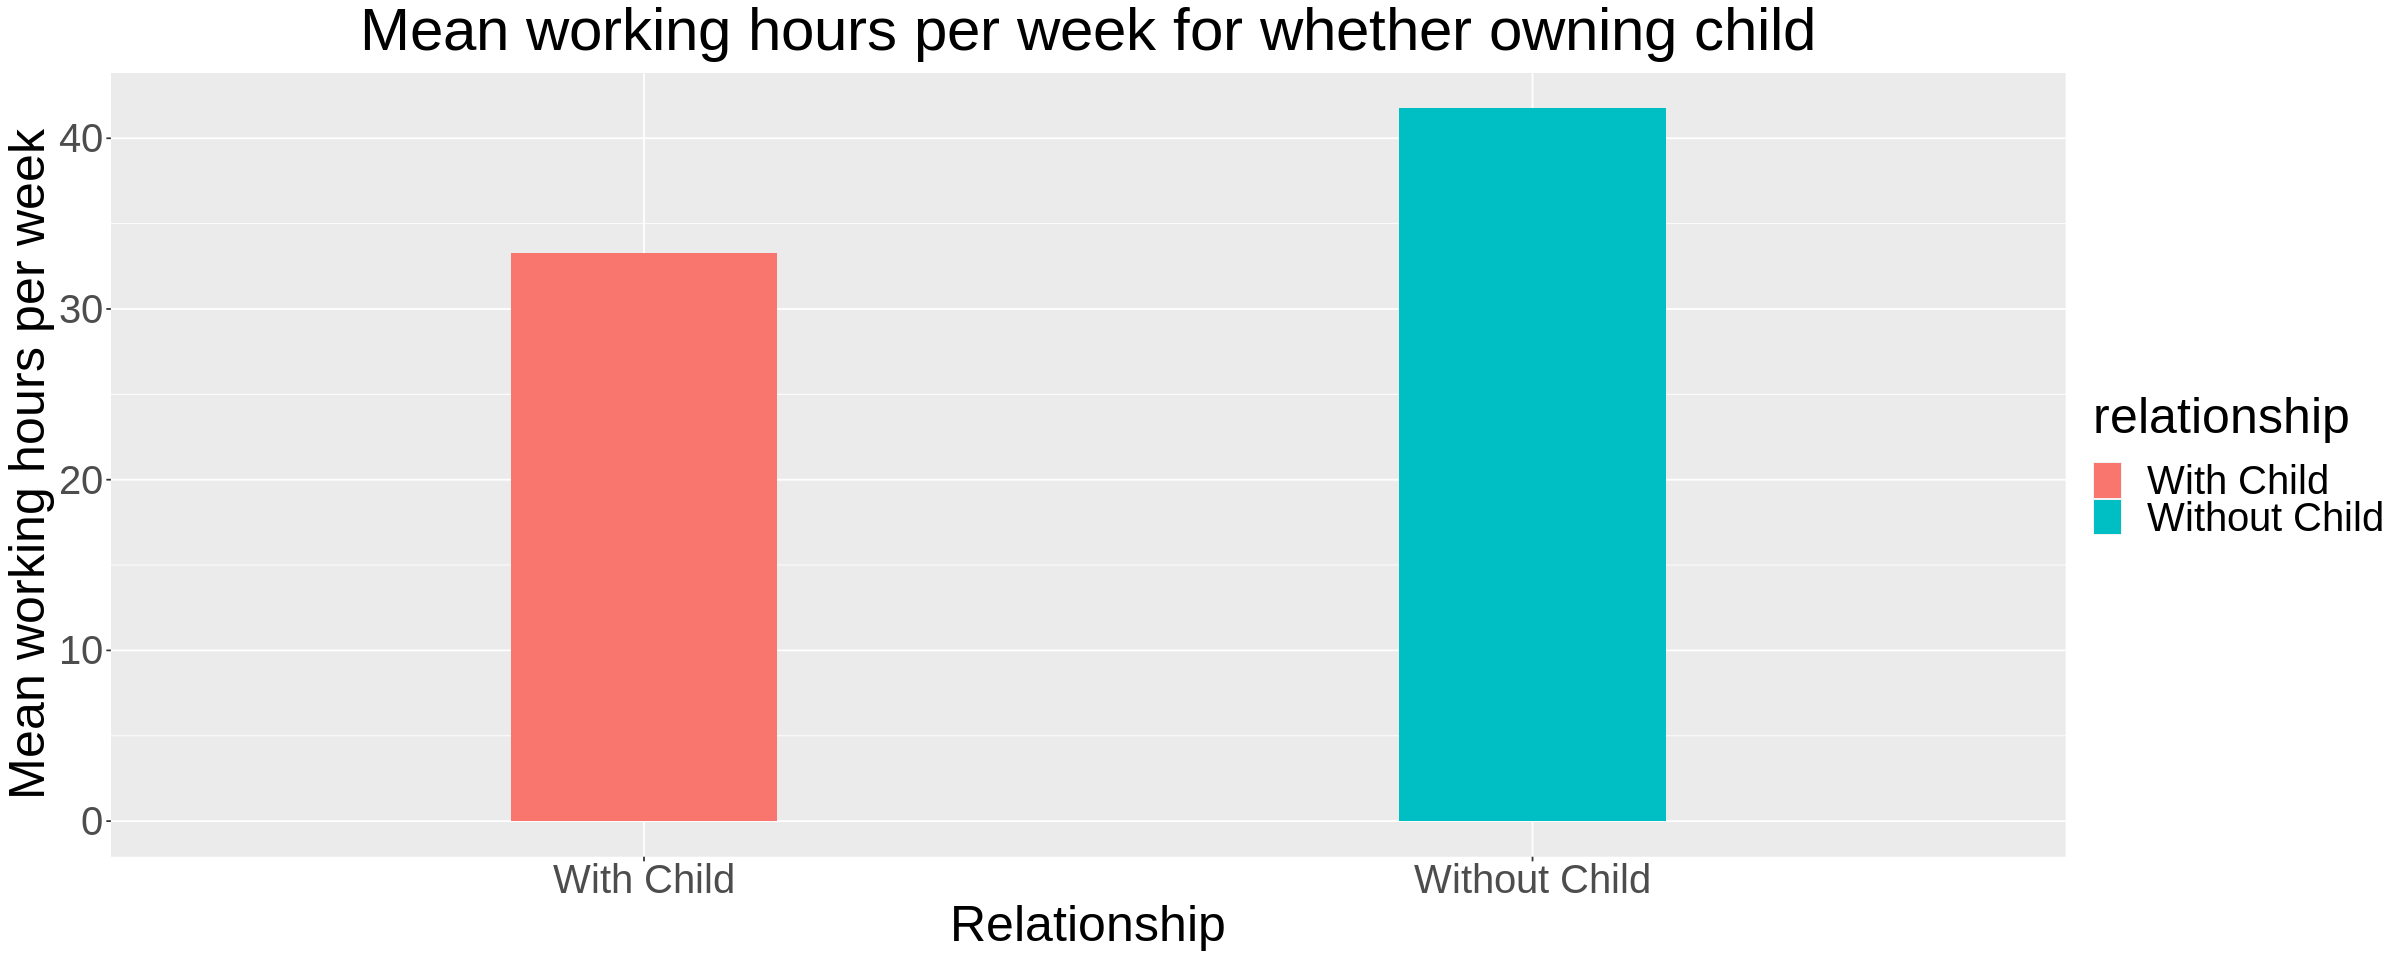

In [21]:
relationship_hpw_plot
relationship_hpw_mean_plot

For the relationship between working hours per week for whether owning a child:
- From the first graph, we observed that the median of owning a child to contain the same value of 40 hours of not having a child. However, the median of owning a child (50% percentile) equals its upper interquartile (75 percentile) range while the median of not owning a child(50% percentile) equals its lower interquartile(25 percentile) range.  
- From the second graph, we found that the mean of working hours for people who do not have children to be larger (41.75881 hours) than those who have children’s working hours (33.26934 hours). 
- The fact that we do not maintain clear evidence of the different working hours for owning or not only a child made it necessary for us to utilize hypothesis tests to further prove our statement. 

#### Hypothesis Test

By using hypothesis test, we want to see whether the mean working hours per week for people with child is different from the mean working hours per week for people without child at 5% significance level. Let $\mu_1$ be the mean working hours per week for people with child, and $\mu_2$ be the mean working hours per week for people without child.

So we have:

$H_0$: $\mu_1 = \mu_2$

$H_1$: $\mu_1 \neq \mu_2$

Below we obtain the sample mean and save it as `relationship_obs_stat` and simulate from the null model `relationship_null_model`.

In [22]:
set.seed(50)

# We take one sample from the population
relationship_sample <- 
    adult_data %>%
    rep_sample_n(size = 500, replace = F) %>%
    select(relationship, hours_per_week)

# We obtain the observed statistic from the sample we took
relationship_obs_stat <-
    relationship_sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))

# We get the null model 
relationship_null_model <- 
    relationship_sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))
    
head(sex_null_model)

Adding missing grouping variables: `replicate`


replicate,stat
<int>,<dbl>
1,0.6472837
2,-0.9353943
3,0.8231369
4,-1.7921146
5,0.8547002
6,-1.5305894


*Table 1.10 Difference in mean working hours per week for people with child and without child under null model*

Then, we want to plot the result of hypothesis test and we call it `relationship_result_plot`.

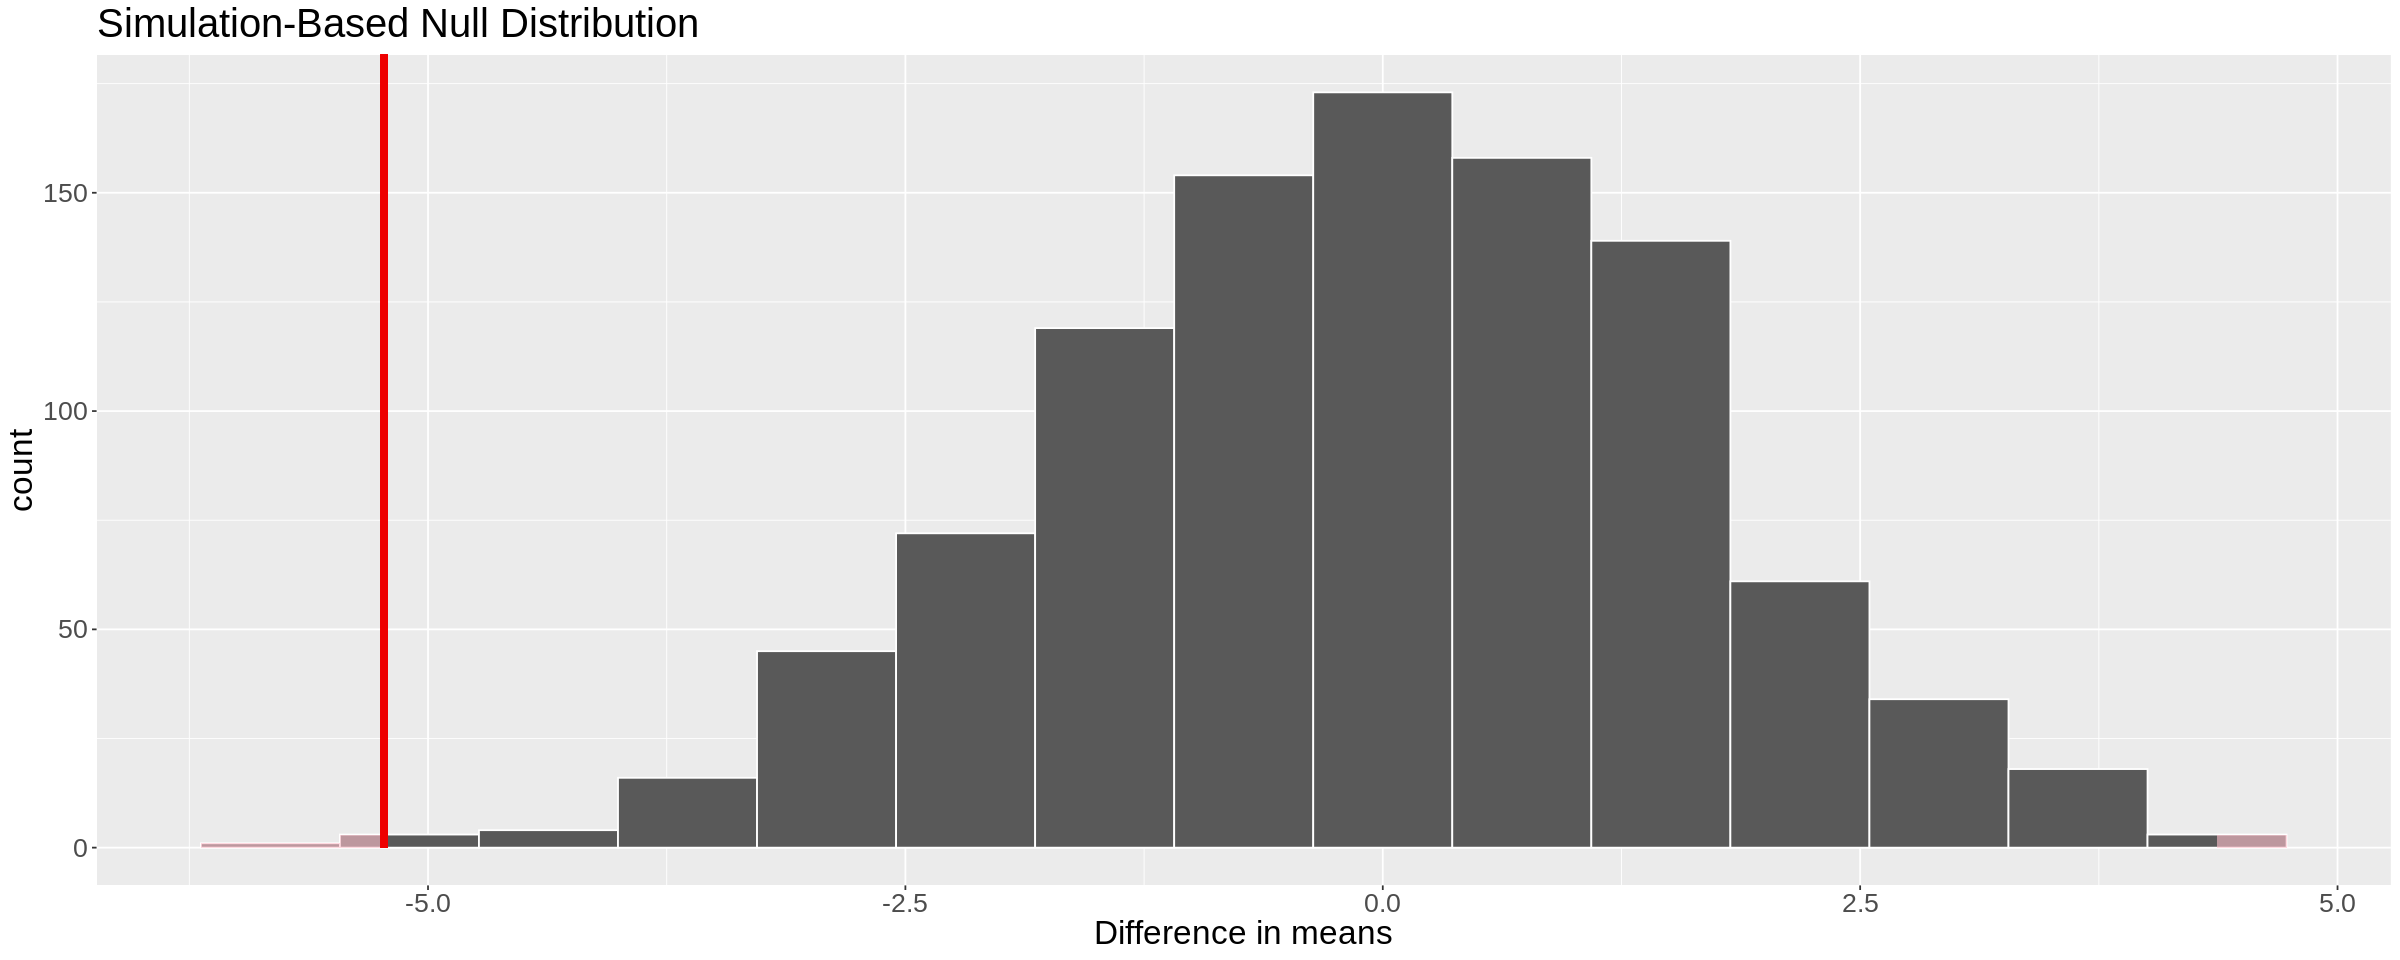

In [23]:
relationship_result_plot <- 
    relationship_null_model %>%
    visualize() +
    xlab("Difference in means") +
    shade_p_value(obs_stat = relationship_obs_stat$stat, direction = "both") +
    theme(text = element_text(size = 20))

relationship_result_plot

*Figure 1.9 The plot of null distribution for difference in mean working hours per week for people with child and without child*

We then obtain the p-value from relationship_null_model and we call it `relationship_p_value`.

In [24]:
relationship_p_value <- 
    relationship_null_model %>%
    get_p_value(obs_stat = relationship_obs_stat$stat, direction = "both") %>%
    pull()

relationship_p_value

[1] 0.002

We obtained the p-value is 0.002 which is smaller than 0.05. Therefore, we can conclude that given p-value is 0.002 we reject the null hypothesis at the 5% significance level based on the results of the hypothesis test, which is saying, we reject at 5% significance the null hypothesis that the mean working hours per week is the same for people with child and people without child. We can also interpret the result as it would be unlikely to observe a difference in the average working hours per week of - 5.23 if both people with child and people without child have the same mean weekly working hours.

#### Bootstrapping and Confidence Interval

We would like to find the 95% confidence interval for the difference in mean working hours per week for people with child and without child and we call it `relationship_bootstrapping_diff_in_mean_ci`.

In [25]:
set.seed(50)

relationship_sample <- 
    adult_data %>%
    rep_sample_n(size = 500, reps = 1, replace = F) %>%
    select(relationship, hours_per_week)

relationship_bootstrapping_diff_in_mean <-
    relationship_sample %>%
    specify(formula = hours_per_week ~ relationship) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("With Child", "Without Child"))

relationship_bootstrapping_diff_in_mean_ci <-
    relationship_bootstrapping_diff_in_mean %>%
    get_confidence_interval(level = 0.95, type = "percentile")

relationship_bootstrapping_diff_in_mean_ci

Adding missing grouping variables: `replicate`


lower_ci,upper_ci
<dbl>,<dbl>
-8.667861,-1.788315


*Table 1.11 The 95% confidence interval for bootstrap distribution of difference in mean working hours per week for people with child and without child*

Then we want to visualize the confidence interval `relationship_bootstrapping_diff_in_mean_ci` with the bootstrap distribution `relationship_bootstrapping_diff_in_mean`, and we call the plot `relationship_bootstrapping_diff_in_mean_plot`.

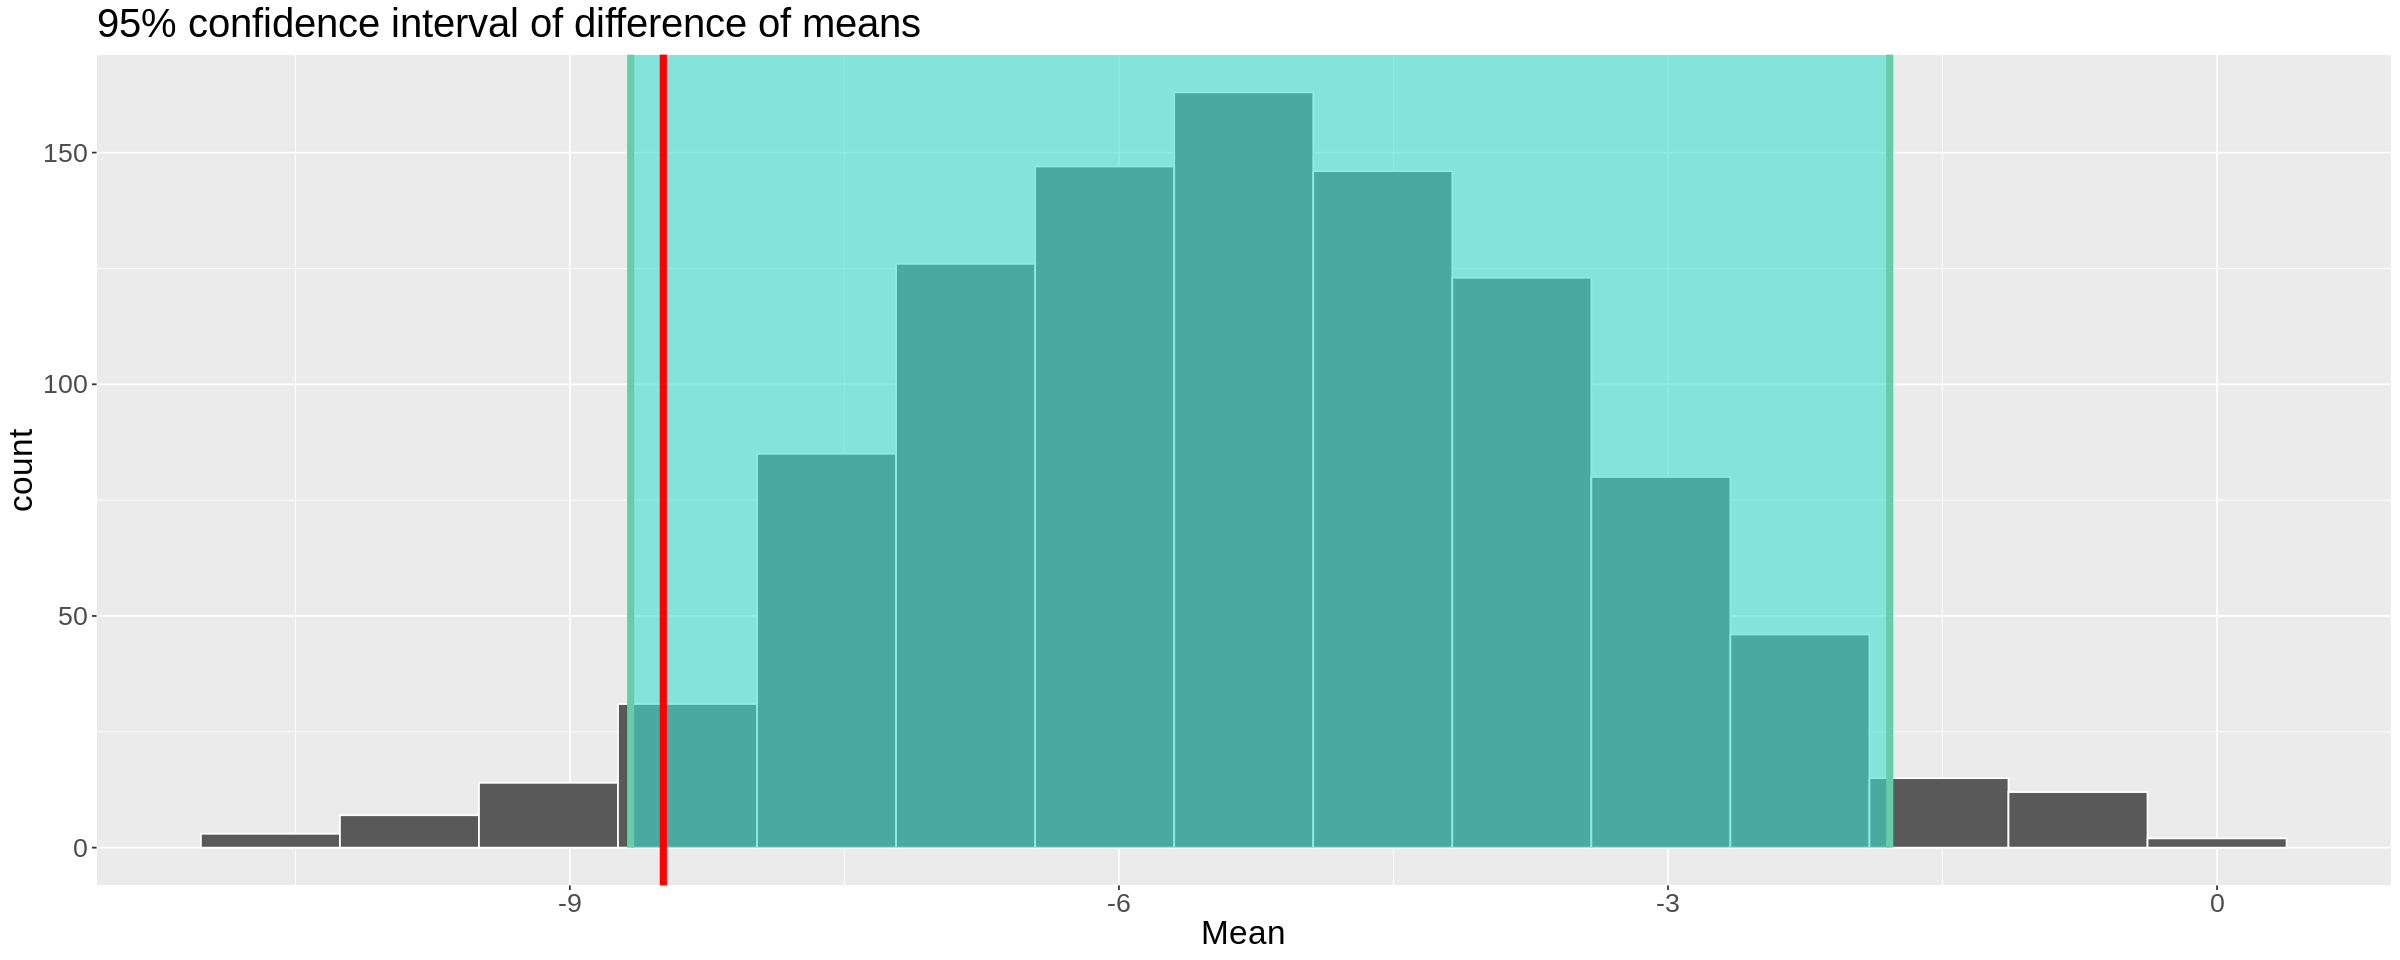

In [26]:
relationship_true_diff <-
    relationship_hpw$mean[1] - relationship_hpw$mean[2]

relationship_bootstrapping_diff_in_mean_plot <-
    relationship_bootstrapping_diff_in_mean %>%
    visualize() +
    shade_confidence_interval(endpoints = relationship_bootstrapping_diff_in_mean_ci) +
    theme(text = element_text(size = 20)) +
    xlab("Mean") +
    ggtitle("95% confidence interval of difference of means") +
    geom_vline(xintercept = relationship_true_diff, colour = "red", size = 2)

relationship_bootstrapping_diff_in_mean_plot

*Figure 1.10 Visualization of 95% confidence interval to the bootstrap distribution of difference in mean working hours per week for people with child and without child*

We also want to look at the 95% confidence interval for the mean working hours per week for people with child and without child repectively. We call them `bootstrap_with_child_ci` and `bootstrap_without_child_ci`.

In [27]:
set.seed(50)

# We first look at bootstrap dist for mean working hours per week for people with child
bootstrap_with_child <- 
    relationship_sample %>%
    filter(relationship == "With Child") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean") 

# Get 95% confidence interval from bootstrap_with_child
bootstrap_with_child_ci <- 
    bootstrap_with_child %>%
    get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_with_child_ci

# We then look at bootstrap dist for mean working hours per week for people without child
bootstrap_without_child <- 
    relationship_sample %>%
    filter(relationship == "Without Child") %>%
    specify(response = hours_per_week) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")  

# Get 95% confidence interval from bootstrap_without_child
bootstrap_without_child_ci <-
    bootstrap_without_child %>%
    get_confidence_interval(level = 0.95, type = "percentile")
bootstrap_without_child_ci

lower_ci,upper_ci
<dbl>,<dbl>
33.50697,40.27951


lower_ci,upper_ci
<dbl>,<dbl>
40.8701,43.08895


*Table 1.12 The 95% confidence interval for bootstrap distribution of mean working hours per week for people with child and without child respectively*

#### CLT and Confidence Interval

There are 3 pre-conditions in order to utilize the Central Limit Theorem Method：
1. All the samples taken should be independent from the population. 
2. To achieve the independence of the sample’s variables, the sample size must be less than 10% of the population size. 
3. Sample size must be large enough (at least 30) to be representative of the whole population.

Since we have met all three conditions above, we can now obtain the 95% confidence interval for the mean working hours per week for people with child and without child using Central Limit Theorem. We call them `clt_with_child_ci` and `clt_without_child_ci`. 

In [28]:
set.seed(50)

pop_relationship <- adult_data %>% 
    select(relationship, hours_per_week)

# We get sample for people with child and without child respectively
sample_with_child <- pop_relationship %>%
    filter(relationship == "With Child") %>%
    rep_sample_n(size = 500, replace = F)

sample_without_child <- pop_relationship %>%
    filter(relationship == "Without Child") %>%
    rep_sample_n(size = 500, replace = F)

# We compute the mean and standard error for each sample
with_child_sum <- sample_with_child %>%
    summarise(mean = mean(hours_per_week),
              se = sd(hours_per_week)/sqrt(nrow(sample_with_child)))

without_child_sum <- sample_without_child %>%
    summarise(mean = mean(hours_per_week),
              se = sd(hours_per_week)/sqrt(nrow(sample_without_child)))

# We obtain the 95% confidence interval using CLT 
clt_with_child_ci <- 
    tibble(
        lower_ci = qnorm(0.025, mean = with_child_sum$mean, sd = with_child_sum$se),
        upper_ci = qnorm(0.975, mean = with_child_sum$mean, sd = with_child_sum$se))
clt_male_ci

clt_without_child_ci <- 
    tibble(
        lower_ci = qnorm(0.025, mean = without_child_sum$mean, sd = without_child_sum$se),
        upper_ci = qnorm(0.975, mean = without_child_sum$mean, sd = without_child_sum$se))
clt_without_child_ci

lower_ci,upper_ci
<dbl>,<dbl>
41.47058,42.99942


lower_ci,upper_ci
<dbl>,<dbl>
40.68179,42.64221


*Table 1.13 The 95% confidence interval for the mean working hours per week for people with child and without child using CLT*

#### Comparing Bootstrapping and CLT

Below shows the visualization of the bootstrap sampling distribution and Normal density given by CLT.

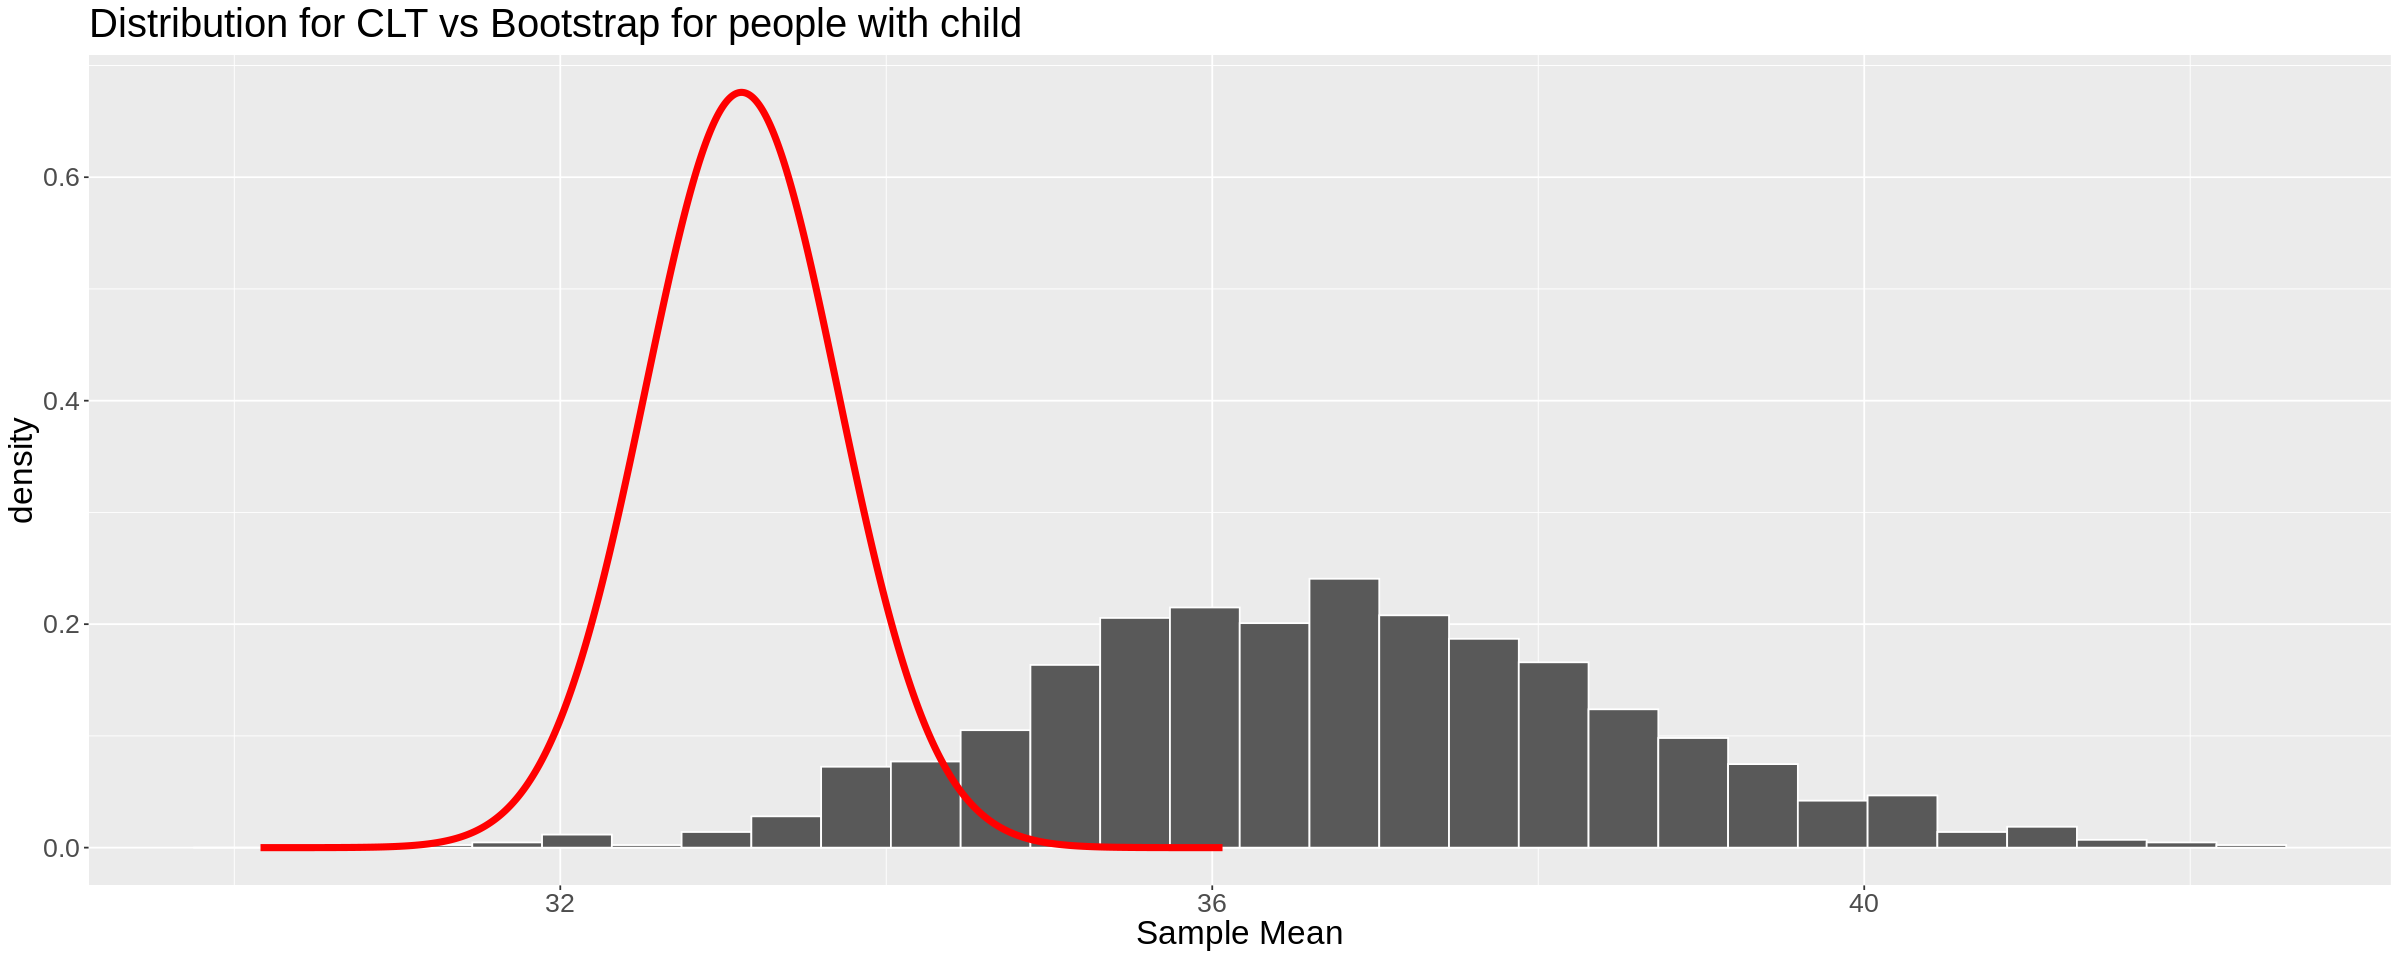

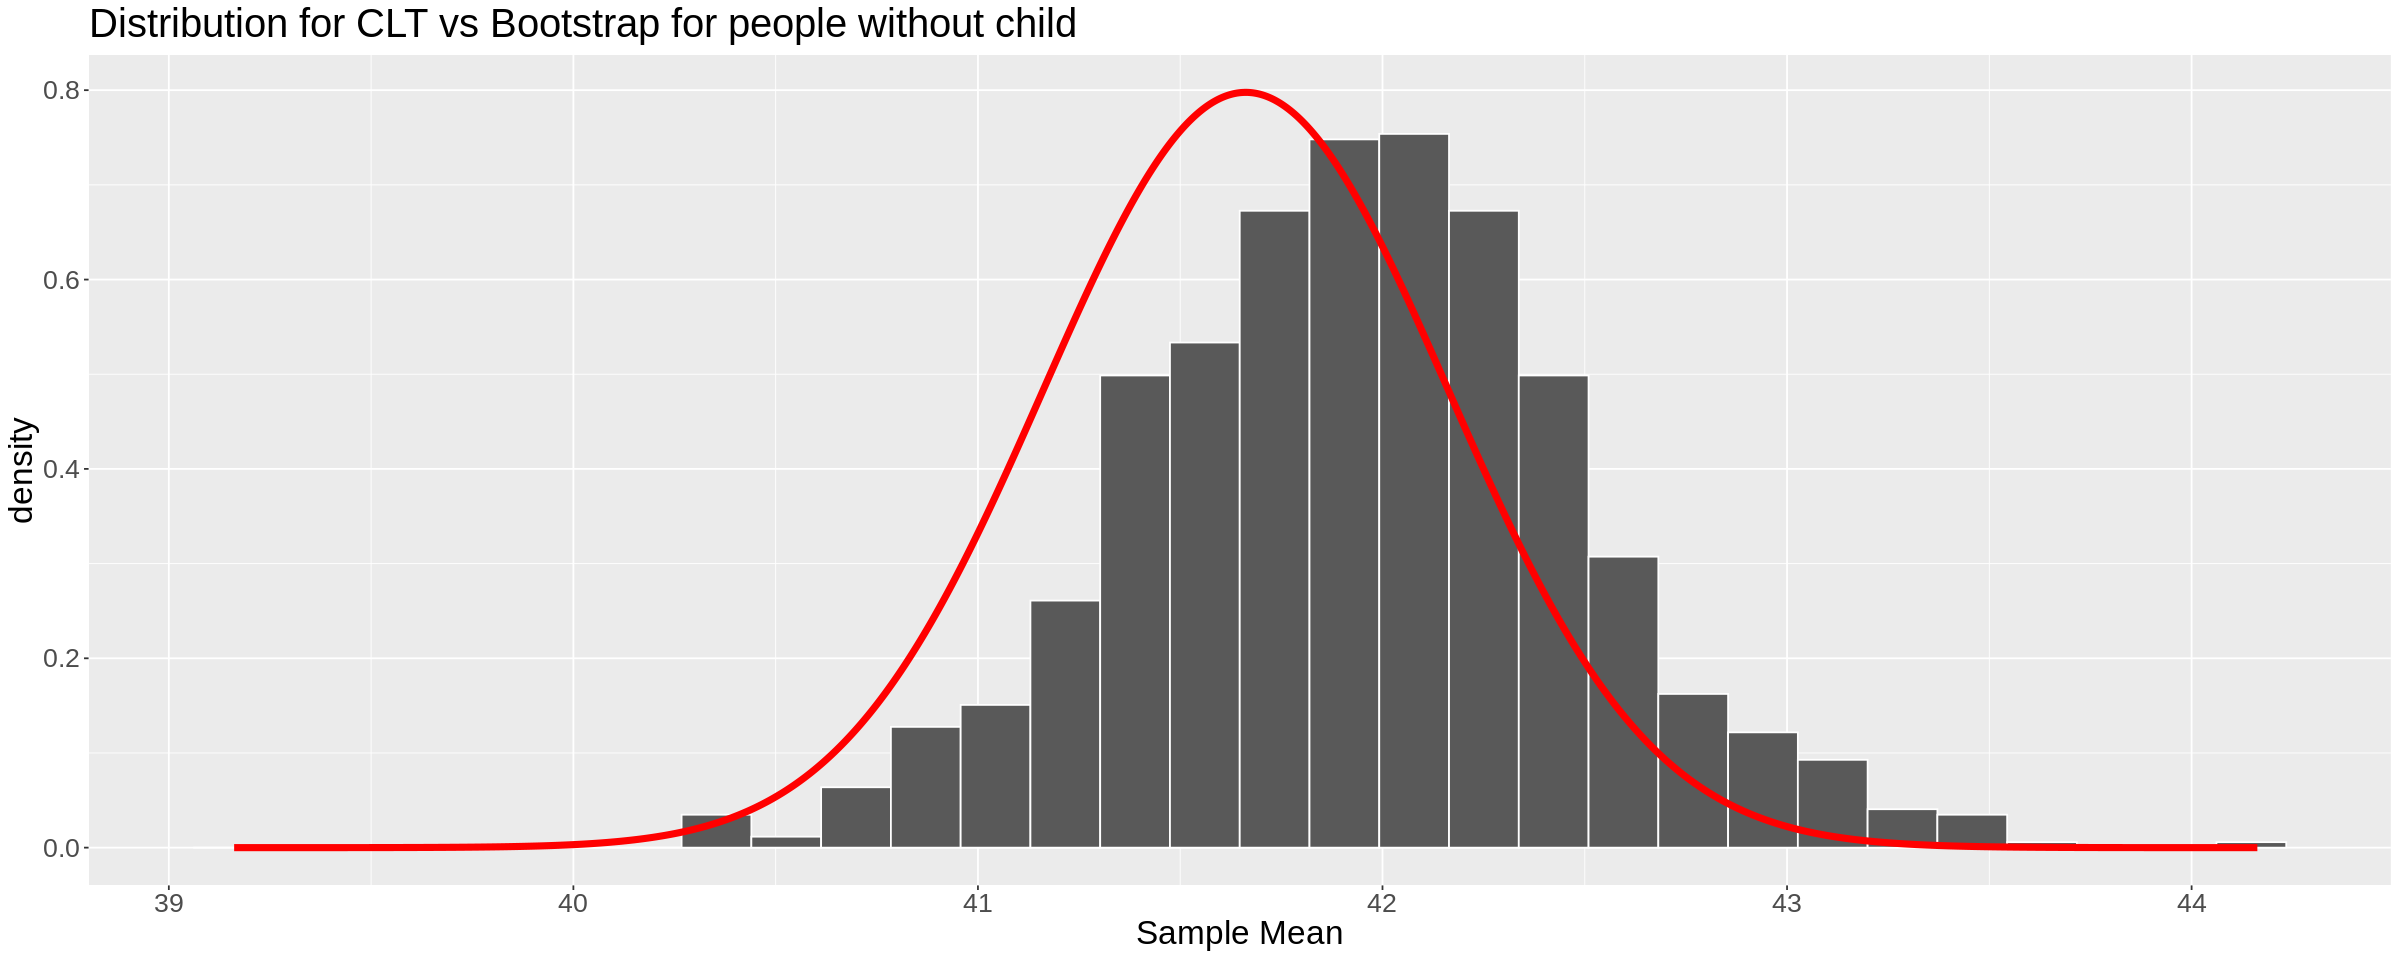

In [29]:
# Obtain sample mean for people with and without child
with_child_x_bar <- with_child_sum$mean
without_child_x_bar <- without_child_sum$mean

# Obtain the sample std error for people with and without child
with_child_std_error <- with_child_sum$se
without_child_std_error <- without_child_sum$se

# Get the normal curve
with_child_clt_samp_dist <- 
    tibble(x = seq(with_child_x_bar - 5 * with_child_std_error, 
                   with_child_x_bar + 5 * with_child_std_error, 0.0001),
           density = dnorm(x, with_child_x_bar, with_child_std_error))

without_child_clt_samp_dist <- 
    tibble(x = seq(without_child_x_bar - 5 * without_child_std_error, 
                   without_child_x_bar + 5 * without_child_std_error, 0.0001),
           density = dnorm(x, without_child_x_bar, without_child_std_error))

# Then we plot the bootstrap vs the CLT estimates
with_child_btsp_vs_clt_samp_dist_plot <- 
    bootstrap_with_child %>% 
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    geom_line(data = with_child_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    xlab("Sample Mean") + 
    ggtitle("Distribution for CLT vs Bootstrap for people with child") + 
    theme(text = element_text(size = 20))

without_child_btsp_vs_clt_samp_dist_plot <- 
    bootstrap_without_child %>% 
    ggplot() + 
    geom_histogram(aes(stat, ..density..), bins = 30, color = 'white') + 
    geom_line(data = without_child_clt_samp_dist, aes(x, density), lwd = 2, color = "red") + 
    xlab("Sample Mean") + 
    ggtitle("Distribution for CLT vs Bootstrap for people without child") + 
    theme(text = element_text(size = 20))

with_child_btsp_vs_clt_samp_dist_plot
without_child_btsp_vs_clt_samp_dist_plot

*Figure 1.11 Comparing the bootstrap sampling distribution with normal density given by CLT*

### Bootstrapping vs. Asymptotics

We used both the Asymptotic method, Central Limit Theorem (CLT) in our case, and bootstrap in our analysis because our dataset satisfied both requirements: 
 + We have over 30000 datasets that contain almost all possible cases, we treated this dataset as a population;  
 + The population has a normal distribution;
 + We used both bootstrapping and CLT methods to estimate the sample mean, in order to compare the confidence interval;
 + The confidence interval is useful to measure the greatness of our estimates. 

The large sample size made both the bootstrap and CLT have similar bootstrap distribution with normalized shape. 

However, the fact that our population has over 16000 datasets scattered in the middle and very few datasets scattered near the end of the plot. Let's take a look at the investigation of relationship of owning child and the working hours per week. Since bootstrap distribution is conducted through randomly selected 500 samples, there is no guarantee that all the points selected are from the center (near the median of the population). On top of that, we observed a difference between the CLT distribution and the bootstrap distribution. Because most of the population is concentrated around 40, this leads to the fact that when we draw a sample, we are likely to extract data points in the middle. However, when we draw for bootstrapping, with randomly selected samples, the probability of selecting data points in the middle or on both sides of the population (replacement = True) varies. In addition, the existence of outliers can be found where people with children that worked extra hard with long hours per week. These cases can be selected when we demonstrate the bootstrapping method. In conclusion, it is fair to discover a difference between bootstrap and CLT. 

Both bootstrap and CLT are very reliable, as they can handle different scenarios. In our case, since we are satisfied with both bootstrap and CLT’s conditions, we cannot say which method is better. Bootstrap is a great method to use when people do not have population standard deviation, as it requires a normalized sample distribution. CLT on the other hand requires a population standard deviation, but can still discover the sample mean even if the population distribution is not normalized. Both methods support us to determine the confidence level of our estimates, therefore we used both methods to ensure accuracy. 

## Discussion

#### Summarization of our findings 

- We rejected the null hypothesis of no difference in mean working hours between having a child or not having a child. With a p-value much smaller than the significance level, we strongly suggest that there is a relationship between working hours and having a child. 
- We also rejected the null hypothesis of no difference between sex and mean working hours. With a p-value much smaller than the significance level, we strongly suggest that there is a relationship between working hours and females vs males. 

#### Impactions

- Through the examination between relationship and working hours, a company could determine whether they should hire a single person or someone with a child. 
- We wish to reject the hypothesis of the relationship between race and working hours, as race should not be a determining factor when companies decide to hire workers. 
- We also hope to prove that sex will not be a major factor in working hours, eliminating this from companies’ recruiting restrictions and further emphasizing gender equality. 


#### Discussion for Results

- We consider the results to be matched with our original expectations of the impact of having a child on working hours based on our findings in both factors.
- However, our expectation differs from the result for the effect of sex to working hours. Our original prompt was to find no relationship between working hours and sex, but in fact, we did discover a relationship between sex and working hours. In general, the female working hours are different from male working hours by 5.76 hours per week.

#### Future questions that are closely associated with our project:

- Based on our analysis, we proved the relationship between working hours and sex and having a child. However, the hypothesis test and confidence interval vs significance interval can only prove the likelihood of rejecting our null hypothesis rather than the level of impactfulness of sex and having a child towards working hours. Therefore, people can conduct further research regarding the percentage, or the exact impact of sex and having a child towards working hours. 

#### Future Questions for students who have an interest in our project:

- Is there a correlation between working hours and work efficiency?
- Is there a direct relationship between income and working hours?
- Will people’s occupation level alter their working hours significantly? 
- Does Marital Status play an important role in working hours? 

## References

**References**

Artazcoz, L., Cortès-Franch, I., Escribà-Agüir, V., López, M., & Benavides, F. G. (2018). Long working hours and job quality in europe: Gender and welfare state differences. *International Journal of Environmental Research and Public Health, 15*(11), 2592. https://doi.org/10.3390/ijerph15112592

Pencavel, J. H., & UPSO eCollections (University Press Scholarship Online). (2018). *Diminishing returns at work: The consequences of long working hours*. Oxford University Press. https://doi.org/10.1093/oso/9780190876166.001.0001



**References(Picture)**

[1] Register with your work email now to: The Employee Benefits & Engagement Platform - Vantage Circle. (n.d.). Retrieved July 26, 2022, from https://blog.vantagecircle.com/content/images/2019/07/flexible-working-time.png


**References(Databases)**

Kohavi, R., & Becker, B. (1996, May 1). Adult Data Set. Retrieved 2021, from https://archive.ics.uci.edu/ml/datasets/adult. The dataset was retrieved from: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository *Irvine, CA: University of California, School of Information and Computer Science*. http://archive.ics.uci.edu/ml]. 